# Ny sektion

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
try: 
  import tensorflow_text as text
except:
  !pip install tensorflow_text -q
  import tensorflow_text as text

import numpy as np

dataset_tf = tfds.load('squad')
print(dataset_tf)

#from google.colab import drive
#drive.mount('/content/drive')

     |████████████████████████████████| 4.9 MB 5.1 MB/s 


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/squad/v1.1/2.0.0.incompleteCKBR6F/squad-train.tfrecord


  0%|          | 0/87599 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/squad/v1.1/2.0.0.incompleteCKBR6F/squad-validation.tfrecord


  0%|          | 0/10570 [00:00<?, ? examples/s]

Dataset squad downloaded and prepared to /root/tensorflow_datasets/squad/v1.1/2.0.0. Subsequent calls will reuse this data.
{'train': <PrefetchDataset shapes: {answers: {answer_start: (None,), text: (None,)}, context: (), id: (), question: (), title: ()}, types: {answers: {answer_start: tf.int32, text: tf.string}, context: tf.string, id: tf.string, question: tf.string, title: tf.string}>, 'validation': <PrefetchDataset shapes: {answers: {answer_start: (None,), text: (None,)}, context: (), id: (), question: (), title: ()}, types: {answers: {answer_start: tf.int32, text: tf.string}, context: tf.string, id: tf.string, question: tf.string, title: tf.string}>}


# Extract SQuAD data

## Data Format
- **i'th** title of subject: `dataset['data'][i]['title']`
- **i'th** paragraph list of subject: `dataset['data'][i]['paragraphs']`
  - **j'th** paragraph (context): `dataset['data'][i]['paragraphs'][j]['context']`
  - **j'th** paragraph (qas): `dataset['data'][i]['paragraphs'][j]['qas']`
    - **k'th** QA (answers): `dataset['data'][i]['paragraphs'][j]['qas'][k]['answers']`
      - **l'th** Answer start: `dataset['data'][i]['paragraphs'][j]['qas'][k]['answers'][l]['answer_start']`
      - **l'th** text: `dataset['data'][i]['paragraphs'][j]['qas'][k]['answers'][l]['text']`
    - **k'th** QA (id): `dataset['data'][i]['paragraphs'][j]['qas'][k]['id']`
    - **k'th** QA (is_impossible): `dataset['data'][i]['paragraphs'][j]['qas'][k]['is_impossible']`
    - **k'th** plausible_answers `dataset['data'][i]['paragraphs'][j]['qas'][k]['plausible_answers']` *(seemingly only present if 'is_impossible' is true)*
      - **l'th** Answer start: `dataset['data'][i]['paragraphs'][j]['qas'][k]['answers'][l]['answer_start']`
      - **l'th** text: `dataset['data'][i]['paragraphs'][j]['qas'][k]['answers'][l]['text']`
    - **k'th** QA (question): `dataset['data'][i]['paragraphs'][j]['qas'][k]['question']`

# Gør anderledes
https://blog.tensorflow.org/2020/12/making-bert-easier-with-preprocessing-models-from-tensorflow-hub.html

In [ ]:
def get_preprocessor():
    # Source: https://www.tensorflow.org/text/tutorials/classify_text_with_bert
    tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3'
    tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3'
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name="text_input")
    preprocessing = hub.load(tfhub_handle_preprocess)
    return preprocessing
    #tf.keras.Model(text_input,
           #               encoder(preprocessing(text_input))['sequence_output'])
preprocessor = get_preprocessor()

In [ ]:
preprocessor([tf.constant('test 1')])

{'input_mask': <tf.Tensor: shape=(1, 128), dtype=int32, numpy=
 array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       dtype=int32)>,
 'input_type_ids': <tf.Tensor: shape=(1, 128), dtype=int32, numpy=
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 

# Preprocessing (working)
https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3

Allow tokenization and pre-processing of both a *question* and a *context*.  
Segment A: Question  
Segment B: Question Context

Expects a **Batch**

### **IMPORTANT**  
-If sequence length is too short, it might truncate the question/context


In [ ]:
# Step 1: tokenize batches of text inputs. 
text_inputs = [tf.keras.layers.Input(shape=(), dtype=tf.string), tf.keras.layers.Input(shape=(), dtype=tf.string)] # 2 text inputs
tokenize = hub.KerasLayer(preprocessor.tokenize, name='tokenizer')
tokenized_inputs = [tokenize(text_inputs[0]), tokenize(text_inputs[1])]

tokenize_debug = tf.keras.Model(text_inputs, tokenized_inputs, 
                                name='tokenizer_debug')

# Step 2: pack input sequences for the Transformer encoder.
seq_length = 128 # tf.add(tokenized_inputs[0][0].shape[0], tokenized_inputs[1][0].shape[0])

bert_pack_inputs = hub.KerasLayer(
    preprocessor.bert_pack_inputs,
    arguments=dict(seq_length=seq_length), name='bert_pack_inputs')  # Optional argument.

encoder_inputs = bert_pack_inputs(tokenized_inputs)



pp = tf.keras.Model(text_inputs, encoder_inputs, name='preprocessor')
encoders  = hub.KerasLayer(
    'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    name='BERT',
    trainable=True)

BERT = tf.keras.Model(text_inputs, encoders(pp(text_inputs))['sequence_output'])


#pp([tf.constant(['Test 1', 'Test 1']), tf.constant(['Test 2', 'Test 2'])])

In [ ]:
tokenize(tf.constant(['Hello World', 'asdf qwerty']))

<tf.RaggedTensor [[[8667], [1291]], [[1112, 1181, 2087], [186, 12097, 2340]]]>

Output på et question: "Hello World" og en kontekst "asdf qwerty" er en ragged tensor ```<tf.RaggedTensor [[[8667], [1291]], [[1112, 1181, 2087], [186, 12097, 2340]]]>```.
Heri får hvert ord en liste af tokens, eks: "Hello" får `[8667]` og "asdf" får `[1112, 1181, 2087]`. "Hello World" bliver en liste af tokens for hvert ord: `[[8667], [1291]]`.

In [ ]:
import numpy as np
import sys

obs = dataset_tf['train'].cardinality().numpy()
lens = np.zeros(obs)

for i, a in enumerate(dataset_tf['train'].map(lambda x: (x['question'], x['context'])).batch(1)):
  b = tokenize_debug(a)
  lens[i] += b[0][0].values.shape[0] + b[1][0].values.shape[0]
  sys.stdout.flush()
  sys.stdout.write('\rProgress: {:.2f}%'.format((i+1)/obs * 100))

Progress: 100.00%

Text(0, 0.5, 'Occurences')

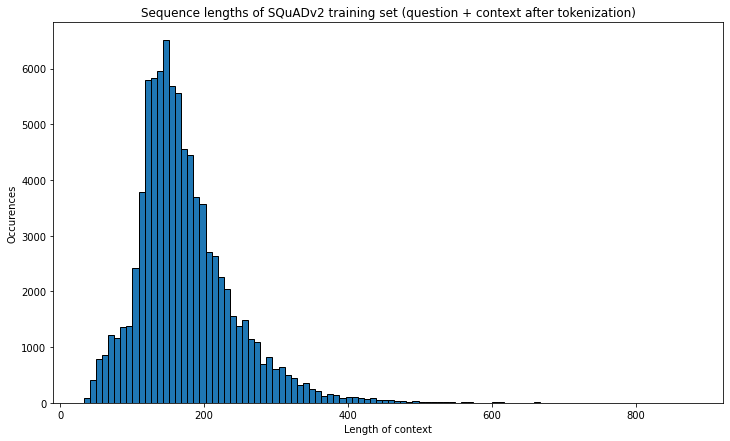

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
plt.hist(lens, bins=100, edgecolor='black')
plt.title("Sequence lengths of SQuADv2 training set (question + context after tokenization)")
plt.xlabel("Length of tokenized sequence")
plt.ylabel("Occurences")

Vi gemmer lige histogrammet:
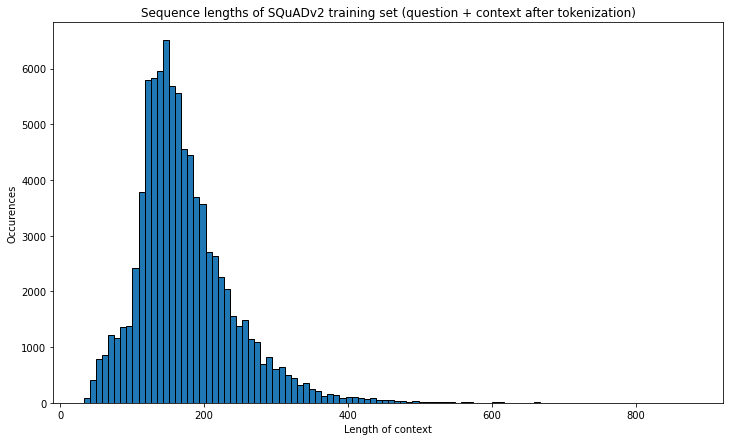

# Baseline Linear Output Layer

Map from (Batch, Seq_length, Seq_Encoding) to (Batch, Seq_length, 2)!


In [ ]:
from tensorflow.keras.layers import Dense, Softmax, ReLU

seq_length = 400 # Sequence Length chosen based on the distribution of the tokenized length of Questions+Context (see histogram above)

def get_bert_model():
  # Step 1: tokenize batches of text inputs. 
  text_inputs = [tf.keras.layers.Input(shape=(), dtype=tf.string), tf.keras.layers.Input(shape=(), dtype=tf.string)] # 2 text inputs
  tokenize = hub.KerasLayer(preprocessor.tokenize, name='tokenizer')
  tokenized_inputs = [tokenize(text_inputs[0]), tokenize(text_inputs[1])]

  # Step 2: pack input sequences for the Transformer encoder.  
  bert_pack_inputs = hub.KerasLayer(
      preprocessor.bert_pack_inputs,
      arguments=dict(seq_length=seq_length), name='bert_pack_inputs')  # Optional argument.

  encoder_inputs = bert_pack_inputs(tokenized_inputs)

  pp = tf.keras.Model(text_inputs, encoder_inputs, name='preprocessor')
  encoders  = hub.KerasLayer(
      'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
      name='BERT',
      trainable=True)

  return tf.keras.Model(text_inputs, encoders(pp(text_inputs))['sequence_output'])

class BERTOutput(tf.keras.Model):
  def __init__(self, name=None, initializer=tf.keras.initializers.GlorotNormal(), **kwargs):
    super().__init__(**kwargs)

    self.BERT = get_bert_model()

    # Weights throug the dense layer will equal the 'Start' & 'End' vector dot product values which we train.
    self.softmax = Dense(units = 2, activation="Softmax", use_bias=False, kernel_initializer=initializer)

  def call(self, x):
    return tf.transpose(self.softmax(self.BERT(x)), perm=[0,2,1])


BERTLinearOut = BERTOutput(name="the_model")

#BERTLinearOut()

# Remap dataset to following form:
( ( question , context ) , [ ans_start , ans_end ] )

In [ ]:
ds = dataset_tf['train'].map(lambda x: ((x['question'], x['context']), [x['answers']['answer_start'][0], tf.strings.length(x['answers']['text'][0])]))#x['answers']['answer_start'][0] + tf.strings.length(x['answers']['text'])]))#tf.strings.split(x['answers']['text']))]))
for i in ds.batch(2).take(1):
  print(i)
  print(BERTLinearOut(i[0]))

((<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b'What is one use that would require an antenna to receive signals in various ways at once?',
       b'About how many counts existed in the Carolingian Empire?'],
      dtype=object)>, <tf.Tensor: shape=(2,), dtype=string, numpy=
array([b'The difference in the above factors for the case of \xce\xb8=0 is the reason that most broadcasting (transmissions intended for the public) uses vertical polarization. For receivers near the ground, horizontally polarized transmissions suffer cancellation. For best reception the receiving antennas for these signals are likewise vertically polarized. In some applications where the receiving antenna must work in any position, as in mobile phones, the base station antennas use mixed polarization, such as linear polarization at an angle (with both vertical and horizontal components) or circular polarization.',
       b"The coronation of Charlemagne as emperor on Christmas Day 800 is regarded as a turni

# Training on the Data

In [ ]:
BERTLinearOut.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy())
BERTLinearOut.evaluate(ds.batch(1).take(2).prefetch(tf.data.AUTOTUNE))
#BERTLinearOut.predict(ds.batch(1).take(2).prefetch(tf.data.AUTOTUNE))

# Start fra scratch

 En ny måde at lave dataset preprocessing på:
Her tokenizer vi hele datasættet først. Vi finder så ud af hvilken token svaret starter ved og hvilken token svaret slutter ved. Vi bygger så en færdig model hvor vi præprocesserer før vi giver det til modellen.

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
try: 
  import tensorflow_text as text
except:
  !pip install -q tensorflow_text
  import tensorflow_text as text
try:
  from transformers.data.processors.squad import SquadV1Processor, squad_convert_examples_to_features
except:
  !pip install -q transformers
  from transformers.data.processors.squad import SquadV1Processor, squad_convert_examples_to_features
try:
  from datasets import load_dataset
except:
  !pip install -q datasets
  from datasets import load_dataset
import numpy as np

#dataset_tf = tfds.load('squad')
#print(dataset_tf)
#npds = tfds.as_numpy(dataset_tf['train'])

     |████████████████████████████████| 298 kB 5.3 MB/s 
     |████████████████████████████████| 132 kB 67.8 MB/s 
     |████████████████████████████████| 1.1 MB 34.1 MB/s 
     |████████████████████████████████| 243 kB 70.0 MB/s 
     |████████████████████████████████| 192 kB 48.5 MB/s 
     |████████████████████████████████| 160 kB 54.6 MB/s 
     |████████████████████████████████| 271 kB 50.9 MB/s 


## BERT model + preprocessor

In [ ]:
seq_length = 384
doc_stride = 128
num_epochs = 2
training_batch_size = 24
lr = 3e-5

################
# Preprocessor #
################
def get_preprocessor():
    # Source: https://www.tensorflow.org/text/tutorials/classify_text_with_bert
    tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3'
    tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3'
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name="text_input")
    preprocessing = hub.load(tfhub_handle_preprocess)
    return preprocessing

preprocessor_raw = get_preprocessor()

text_inputs = [
    tf.keras.layers.Input(shape=(), dtype=tf.string, name='question_input'),
    tf.keras.layers.Input(shape=(), dtype=tf.string, name='context_input')
] # Give as a tuple: (tf.constant(['Hello World']), tf.constant(['asdf qwerty']))

tokenize = hub.KerasLayer(preprocessor_raw.tokenize, name='tokenizer')
tokenized_inputs = [tokenize(text_inputs[0]), tokenize(text_inputs[1])]

bert_pack_inputs = hub.KerasLayer(
    preprocessor_raw.bert_pack_inputs,
    arguments=dict(seq_length=seq_length), 
    name='bert_pack_inputs'
)
encoder_inputs = bert_pack_inputs(tokenized_inputs)
preprocessor = tf.keras.Model(text_inputs, encoder_inputs, name='preprocessor')

##############
# BERT model #
##############
BERT_raw_input_layer = {
    'input_mask': tf.keras.layers.Input(
        shape=(seq_length), dtype=tf.int32),
    'input_type_ids': tf.keras.layers.Input(
        shape=(seq_length), dtype=tf.int32),
    'input_word_ids': tf.keras.layers.Input(
        shape=(seq_length), dtype=tf.int32)
}


BERT_raw = hub.KerasLayer(
    'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    name='BERT_raw',
    trainable=True)

dense = tf.keras.layers.Dense(
    units = 2,
    activation="Softmax", 
    use_bias=False, 
    kernel_initializer=tf.keras.initializers.GlorotNormal(),
    trainable=True,
    name='BERT_final_dense'
)
BERT_no_preprocessing = tf.keras.Model(
    inputs=BERT_raw_input_layer, 
    outputs=dense(BERT_raw(BERT_raw_input_layer)['sequence_output'])
)
BERT_whole = tf.keras.Model(
    inputs=text_inputs, 
    outputs=dense(BERT_raw(preprocessor(text_inputs))['sequence_output'])
)

# Unit test: Is BERT + preprocessor the same as BERT with preprocessor?
assert np.all(
    BERT_no_preprocessing(
        preprocessor(
            (tf.constant(['Hello World']), tf.constant(['asdf qwerty']))
            )
        ).numpy() == 
    BERT_whole(
        (tf.constant(['Hello World']), tf.constant(['asdf qwerty']))
    ).numpy()
)

INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3'.
INFO:absl:Downloaded https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3, Total size: 1.94MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3'.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3'.
INFO:absl:Downloaded https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3, Total size: 434.04MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3'.


In [ ]:
tfds_examples = tfds.load("squad")
examples = SquadV1Processor().get_examples_from_dataset(tfds_examples, evaluate=False)

INFO:absl:No config specified, defaulting to first: squad/v1.1
INFO:absl:Load pre-computed DatasetInfo (eg: splits, num examples,...) from GCS: squad/v1.1/2.0.0
INFO:absl:Load dataset info from /tmp/tmpxt624k61tfds
INFO:absl:Field info.config_name from disk and from code do not match. Keeping the one from code.
INFO:absl:Field info.config_description from disk and from code do not match. Keeping the one from code.
INFO:absl:Generating dataset squad (/root/tensorflow_datasets/squad/v1.1/2.0.0)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

INFO:absl:Downloading https://rajpurkar.github.io/SQuAD-explorer/dataset/dev-v1.1.json into /root/tensorflow_datasets/downloads/rajpurkar_SQuAD-explorer_dev-v1.1nVRimH71-BT-FaNpwXJPbsOaIBizticanX0lmGhsov8.json.tmp.84ecf030d66740e78d821a7fbade8076...
INFO:absl:Downloading https://rajpurkar.github.io/SQuAD-explorer/dataset/train-v1.1.json into /root/tensorflow_datasets/downloads/rajpurkar_SQuAD-explorer_train-v1.1uLsZc14btZFRCgHMAy9Mn5abwO6wga4bMozTBvOyQAg.json.tmp.ead8dd91831e4b1fa52707093dacef5a...
INFO:absl:Skipping extraction for /root/tensorflow_datasets/downloads/rajpurkar_SQuAD-explorer_dev-v1.1nVRimH71-BT-FaNpwXJPbsOaIBizticanX0lmGhsov8.json (method=NO_EXTRACT).
INFO:absl:Skipping extraction for /root/tensorflow_datasets/downloads/rajpurkar_SQuAD-explorer_train-v1.1uLsZc14btZFRCgHMAy9Mn5abwO6wga4bMozTBvOyQAg.json (method=NO_EXTRACT).
INFO:absl:Generating split train


0 examples [00:00, ? examples/s]

INFO:absl:generating examples from = /root/tensorflow_datasets/downloads/rajpurkar_SQuAD-explorer_train-v1.1uLsZc14btZFRCgHMAy9Mn5abwO6wga4bMozTBvOyQAg.json


Shuffling and writing examples to /root/tensorflow_datasets/squad/v1.1/2.0.0.incomplete8OY2ME/squad-train.tfrecord


  0%|          | 0/87599 [00:00<?, ? examples/s]

INFO:absl:Done writing /root/tensorflow_datasets/squad/v1.1/2.0.0.incomplete8OY2ME/squad-train.tfrecord. Shard lengths: [87599]
INFO:absl:Generating split validation


0 examples [00:00, ? examples/s]

INFO:absl:generating examples from = /root/tensorflow_datasets/downloads/rajpurkar_SQuAD-explorer_dev-v1.1nVRimH71-BT-FaNpwXJPbsOaIBizticanX0lmGhsov8.json


Shuffling and writing examples to /root/tensorflow_datasets/squad/v1.1/2.0.0.incomplete8OY2ME/squad-validation.tfrecord


  0%|          | 0/10570 [00:00<?, ? examples/s]

INFO:absl:Done writing /root/tensorflow_datasets/squad/v1.1/2.0.0.incomplete8OY2ME/squad-validation.tfrecord. Shard lengths: [10570]
INFO:absl:Skipping computing stats for mode ComputeStatsMode.SKIP.
INFO:absl:Constructing tf.data.Dataset for split None, from /root/tensorflow_datasets/squad/v1.1/2.0.0


Dataset squad downloaded and prepared to /root/tensorflow_datasets/squad/v1.1/2.0.0. Subsequent calls will reuse this data.


100%|██████████| 87599/87599 [02:17<00:00, 638.44it/s]


In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

features = squad_convert_examples_to_features(
    examples=examples[5000:6000],
    tokenizer=tokenizer,
    max_seq_length=seq_length,
    doc_stride=doc_stride,
    max_query_length=128,
    is_training=True
)

add example index and unique id: 100%|██████████| 1000/1000 [00:00<00:00, 397187.88it/s]


In [ ]:
tokenizer.build_inputs_with_special_tokens()

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'attention_mask',
 'cls_index',
 'encoding',
 'end_position',
 'example_index',
 'input_ids',
 'is_impossible',
 'p_mask',
 'paragraph_len',
 'qas_id',
 'start_position',
 'token_is_max_context',
 'token_to_orig_map',
 'token_type_ids',
 'tokens',
 'unique_id']

In [ ]:
tokenize(features[0].tokens)

<tf.RaggedTensor [[[164], [140, 15928], [166]], [[1103]], [[175, 18129]], [[9466]], [[2204]], [[13678]], [[1187]], [[136]], [[164], [12342, 2101], [166]], [[1103]], [[175, 18129]], [[5243, 1116]], [[1105]], [[5527]], [[6404]], [[3005]], [[1111]], [[1103]], [[4923]], [[1104]], [[2350]], [[176, 14170, 1183]], [[1127]], [[15188]], [[1106]], [[21293]], [[1103]], [[175, 18129]], [[2306]], [[1104]], [[22572, 1161]], [[108], [108], [25338, 1179]], [[108], [108], [188]], [[1105]], [[2204]], [[1154]], [[17737]], [[1120]], [[19170]], [[1373]], [[1114]], [[22956, 9016, 1320]], [[25550, 1182]], [[119]], [[170]], [[16907]], [[1104]], [[3099]], [[117]], [[1378]], [[1103]], [[4821]], [[1104]], [[1211]], [[1104]], [[1103]], [[1848]], [[175, 18129]], [[2306]], [[1120]], [[1103]], [[8098]], [[1104]], [[1899, 1584]], [[1105]], [[1120]], [[1103]], [[2321]], [[1104]], [[19170]], [[117]], [[1521]], [[5527]], [[3099]], [[1106]], [[1129]], [[1850]], [[1121]], [[1147]], [[2968]], [[1106]], [[2663]], [[17132]],

In [ ]:
features[0].tokens

['[CLS]',
 'the',
 'french',
 'navy',
 'fell',
 'captive',
 'where',
 '?',
 '[SEP]',
 'the',
 'french',
 'marines',
 'and',
 'naval',
 'infantry',
 'intended',
 'for',
 'the',
 'invasion',
 'of',
 'northern',
 'germany',
 'were',
 'dispatched',
 'to',
 'reinforce',
 'the',
 'french',
 'army',
 'of',
 'cha',
 '##lon',
 '##s',
 'and',
 'fell',
 'into',
 'captivity',
 'at',
 'sedan',
 'along',
 'with',
 'napoleon',
 'iii',
 '.',
 'a',
 'shortage',
 'of',
 'officers',
 ',',
 'following',
 'the',
 'capture',
 'of',
 'most',
 'of',
 'the',
 'professional',
 'french',
 'army',
 'at',
 'the',
 'siege',
 'of',
 'metz',
 'and',
 'at',
 'the',
 'battle',
 'of',
 'sedan',
 ',',
 'led',
 'naval',
 'officers',
 'to',
 'be',
 'sent',
 'from',
 'their',
 'ships',
 'to',
 'command',
 'hastily',
 'assembled',
 'res',
 '##er',
 '##vis',
 '##ts',
 'of',
 'the',
 'garde',
 'mobile',
 '.',
 'as',
 'the',
 'autumn',
 'storms',
 'of',
 'the',
 'north',
 'sea',
 'forced',
 'the',
 'return',
 'of',
 'more',
 'o

In [ ]:
tokenize(tf.constant([examples[5000].question_text]))

<tf.RaggedTensor [[[1109], [1497], [9466], [2204], [13678], [1187], [136]]]>

In [ ]:
tokenize(tf.constant([examples[5000].context_text]))

<tf.RaggedTensor [[[1109], [1497], [10603], [1105], [5527], [6404], [3005], [1111], [1103], [4923], [1104], [2350], [1860], [1127], [15188], [1106], [21293], [1103], [1497], [1740], [1104], [20394, 28198, 22318], [1105], [2204], [1154], [17737], [1120], [22087, 6778], [1373], [1114], [9006], [2684], [119], [138], [16907], [1104], [3099], [117], [1378], [1103], [4821], [1104], [1211], [1104], [1103], [1848], [1497], [2306], [1120], [1103], [14214], [1104], [27606], [1105], [1120], [1103], [2651], [1104], [22087, 6778], [117], [1521], [5527], [3099], [1106], [1129], [1850], [1121], [1147], [2968], [1106], [2663], [17132], [8968], [1231, 6906, 18295, 1116], [1104], [1103], [144, 2881, 1162], [8410], [119], [1249], [1103], [8929], [14041], [1104], [1103], [1456], [3017], [2257], [1103], [1862], [1104], [1167], [1104], [1103], [1497], [2968], [117], [1103], [17567], [1104], [1103], [1564], [1528], [9267], [17017], [1105], [1107], [1347], [6339], [1103], [1497], [9466], [3928], [1103], [1756

In [ ]:
features[0].tokens

['[CLS]',
 'the',
 'french',
 'navy',
 'fell',
 'captive',
 'where',
 '?',
 '[SEP]',
 'the',
 'french',
 'marines',
 'and',
 'naval',
 'infantry',
 'intended',
 'for',
 'the',
 'invasion',
 'of',
 'northern',
 'germany',
 'were',
 'dispatched',
 'to',
 'reinforce',
 'the',
 'french',
 'army',
 'of',
 'cha',
 '##lon',
 '##s',
 'and',
 'fell',
 'into',
 'captivity',
 'at',
 'sedan',
 'along',
 'with',
 'napoleon',
 'iii',
 '.',
 'a',
 'shortage',
 'of',
 'officers',
 ',',
 'following',
 'the',
 'capture',
 'of',
 'most',
 'of',
 'the',
 'professional',
 'french',
 'army',
 'at',
 'the',
 'siege',
 'of',
 'metz',
 'and',
 'at',
 'the',
 'battle',
 'of',
 'sedan',
 ',',
 'led',
 'naval',
 'officers',
 'to',
 'be',
 'sent',
 'from',
 'their',
 'ships',
 'to',
 'command',
 'hastily',
 'assembled',
 'res',
 '##er',
 '##vis',
 '##ts',
 'of',
 'the',
 'garde',
 'mobile',
 '.',
 'as',
 'the',
 'autumn',
 'storms',
 'of',
 'the',
 'north',
 'sea',
 'forced',
 'the',
 'return',
 'of',
 'more',
 'o

In [ ]:
examples[5000].question_text

'The French navy fell captive where?'

In [ ]:
import numpy as np

for feature in features:
  

In [ ]:
dir(features[0])
print(features[0].token_to_orig_map)

{9: 0, 10: 1, 11: 2, 12: 3, 13: 4, 14: 5, 15: 6, 16: 7, 17: 8, 18: 9, 19: 10, 20: 11, 21: 12, 22: 13, 23: 14, 24: 15, 25: 16, 26: 17, 27: 18, 28: 19, 29: 20, 30: 21, 31: 21, 32: 21, 33: 22, 34: 23, 35: 24, 36: 25, 37: 26, 38: 27, 39: 28, 40: 29, 41: 30, 42: 31, 43: 31, 44: 32, 45: 33, 46: 34, 47: 35, 48: 35, 49: 36, 50: 37, 51: 38, 52: 39, 53: 40, 54: 41, 55: 42, 56: 43, 57: 44, 58: 45, 59: 46, 60: 47, 61: 48, 62: 49, 63: 50, 64: 51, 65: 52, 66: 53, 67: 54, 68: 55, 69: 56, 70: 56, 71: 57, 72: 58, 73: 59, 74: 60, 75: 61, 76: 62, 77: 63, 78: 64, 79: 65, 80: 66, 81: 67, 82: 68, 83: 69, 84: 70, 85: 70, 86: 70, 87: 70, 88: 71, 89: 72, 90: 73, 91: 74, 92: 74, 93: 75, 94: 76, 95: 77, 96: 78, 97: 79, 98: 80, 99: 81, 100: 82, 101: 83, 102: 84, 103: 85, 104: 86, 105: 87, 106: 88, 107: 89, 108: 90, 109: 91, 110: 91, 111: 92, 112: 93, 113: 94, 114: 95, 115: 96, 116: 97, 117: 98, 118: 99, 119: 100, 120: 101, 121: 102, 122: 103, 123: 104, 124: 105, 125: 106, 126: 107, 127: 108, 128: 109, 129: 110, 1

In [ ]:
data = []

for feature in features:
  

list

In [ ]:
preprocessor_raw(tf.constant([""]))

In [ ]:
preprocessor_raw.tokenize.get_special_tokens_dict()

{'end_of_segment_id': <tf.Tensor: shape=(), dtype=int32, numpy=102>,
 'mask_id': <tf.Tensor: shape=(), dtype=int32, numpy=103>,
 'padding_id': <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 'start_of_sequence_id': <tf.Tensor: shape=(), dtype=int32, numpy=101>,
 'vocab_size': <tf.Tensor: shape=(), dtype=int32, numpy=28996>}

## Dataset

In [ ]:
def count_spaces_before_i(s, i):
    

def prepare_sample(x):
    q = x['question']
    c = x['context']

    # s = x['answers']['answer_start'][0]
    # t = tf.strings.length(x['answers']['text'][0])

    ccs = tokenize(c)
    ans = tokenize(x['answer']['text'])[0]

    tf.where()

    return (q, c), (s, t)
   

#ds = dataset_tf['train'].map(prepare_sample)


for i in ds.batch(2).take(1):
  print(i)
  print(tokenizer(i[0])[0].numpy())

IndentationError: ignored

In [ ]:
preprocessor_raw.tokenize.get_special_tokens_dict()

{'end_of_segment_id': <tf.Tensor: shape=(), dtype=int32, numpy=102>,
 'mask_id': <tf.Tensor: shape=(), dtype=int32, numpy=103>,
 'padding_id': <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 'start_of_sequence_id': <tf.Tensor: shape=(), dtype=int32, numpy=101>,
 'vocab_size': <tf.Tensor: shape=(), dtype=int32, numpy=28996>}

In [ ]:
for i in dataset_tf['train'].take(1):
  print(i)
  print(i['context'].numpy()[427:440])
  print(tokenize(tf.expand_dims(i['context'], axis=0)))
  print(tokenize(i['answers']['text'])[0])

{'answers': {'answer_start': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([427], dtype=int32)>, 'text': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'mobile phones'], dtype=object)>}, 'context': <tf.Tensor: shape=(), dtype=string, numpy=b'The difference in the above factors for the case of \xce\xb8=0 is the reason that most broadcasting (transmissions intended for the public) uses vertical polarization. For receivers near the ground, horizontally polarized transmissions suffer cancellation. For best reception the receiving antennas for these signals are likewise vertically polarized. In some applications where the receiving antenna must work in any position, as in mobile phones, the base station antennas use mixed polarization, such as linear polarization at an angle (with both vertical and horizontal components) or circular polarization.'>, 'id': <tf.Tensor: shape=(), dtype=string, numpy=b'57306bf68ab72b1400f9c4dc'>, 'question': <tf.Tensor: shape=(), dtype=string, numpy=b'W

In [ ]:
npds = tfds.as_numpy(dataset_tf['train'])

In [ ]:

y = tf.numpy_function(my_numpy_func, [])

dataset_tf['train'].map()

NameError: ignored

In [ ]:
ans = 'mobile phones'.split()
txt = """The difference in the above factors for the case of \xce\xb8=0 is the 
reason that most broadcasting (transmissions intended for the public) uses 
vertical polarization. For receivers near the ground, horizontally polarized 
transmissions suffer cancellation. For best reception the receiving antennas 
for these signals are likewise vertically polarized. In some applications where 
the receiving antenna must work in any position, as in mobile phones, the base 
station antennas use mixed polarization, such as linear polarization at an angle 
(with both vertical and horizontal components) or circular polarization.""".split()

def find_sublist(txt, ans):
    txt_len = len(txt)
    ans_len = len(ans)
    for i in range(txt_len):
        skip = False
        for j in range(ans_len):
            if txt[i+j] != ans[j]:
                skip = True
                break  # Break inner loop
        if skip: continue
        else: return (i, i+ans_len)


print(find_sublist(txt, ans))

None


In [ ]:
ans = str(b'mobile phones', 'utf-8')
txt = str(b'The difference in the above factors for the case of \xce\xb8=0 is the reason that most broadcasting (transmissions intended for the public) uses vertical polarization. For receivers near the ground, horizontally polarized transmissions suffer cancellation. For best reception the receiving antennas for these signals are likewise vertically polarized. In some applications where the receiving antenna must work in any position, as in mobile phones, the base station antennas use mixed polarization, such as linear polarization at an angle (with both vertical and horizontal components) or circular polarization.', 'utf-8')

def count_spaces_before_i(s, i):
    spaces=0
    for c in s[0:i]:
        if c == ' ':
            spaces += 1
    return spaces

print(txt)
print(txt.find(ans))
print(txt[txt.find(ans):txt.find(ans)+len(ans)])
sp = count_spaces_before_i(txt, txt.find(ans))
print(txt.split(' ')[sp:sp+2])

The difference in the above factors for the case of θ=0 is the reason that most broadcasting (transmissions intended for the public) uses vertical polarization. For receivers near the ground, horizontally polarized transmissions suffer cancellation. For best reception the receiving antennas for these signals are likewise vertically polarized. In some applications where the receiving antenna must work in any position, as in mobile phones, the base station antennas use mixed polarization, such as linear polarization at an angle (with both vertical and horizontal components) or circular polarization.
427
mobile phones
['mobile', 'phones,']


In [ ]:
#txt.find(ans)
txt.split(' ')[count_spaces_before_i(txt, txt.find(ans)):count_spaces_before_i(txt, txt.find(ans)) + len(str(i['answers']['text'][0]).split(' '))]

['mobile', 'phones,']

In [ ]:
# find the approriate tokens and their position in the tokenized context
# Current problem; what if it exists in several places ?
# Return the candidates in lists
def find_word_token_start(answer_tokens, tokenized_context):
  start_token = answer_tokens[0][0][0].numpy()
  end_token = answer_tokens[0][-1][0].numpy()

  start_candidates = []
  end_candidates = []
  
  for i, v in enumerate(tokenized_context[0]):
    if (v[0].numpy() == start_token):
      start_candidates.append(i)
    if (v[0].numpy() == end_token):
      end_candidates.append(i)

  return start_candidates, end_candidates

# TODO: Bestem token start ud fra 'answer_start'

def remove_if_special(word):
  if (word[-1] == ','):
    #print("\tRemoved special character.")
    return word[0:-1]
  return word

def get_start_word(context, starting_sign_index):
  for j in range(starting_sign_index, len(context)):
    if (context[j] == ',' or context[j] == '.' or context[j] == ' '):
      return context[starting_sign_index:j]

In [ ]:
def filter_fun_aux(c, c_len, a, a_len, i):
  if(i >= c_len):
    return False

  index = c.find(a, i)
  if (index == -1): return False
  if (index == 0 or c[index-1] == ' ') and \
  (index + a_len >= c_len or c[index + a_len] in ' ,.;:!?)'):
    return True
  else: 
    return filter_fun_aux(c, c_len, a, a_len, index + a_len)

def filter_fun(x):
  context_str = str(x['context'], 'utf-8')                                                                            # Context as type String
  context_len = len(context_str)
  answer_text_str = str(x['answers']['text'][0], 'utf-8').lstrip().rstrip()
  answer_len = len(answer_text_str)

  return filter_fun_aux(context_str, context_len, answer_text_str, answer_len, 0)

# Tests for filter function

assert filter_fun_aux('hej', 3, 'hej', 3, 0)
assert filter_fun_aux('Goddag du', 9, 'du', 2, 0)
assert filter_fun_aux('Goddag du.', 9, 'du', 2, 0)
assert filter_fun_aux('Goddag du gamle', 9, 'du', 2, 0)
assert not filter_fun_aux('Goddag du', 9, 'Hej', 3, 0)
assert not filter_fun_aux('Goddag du', 9, 'dag', 3, 0)
assert not filter_fun_aux('Goddag du', 9, 'God', 3, 0)
assert not filter_fun_aux('Goddag du', 9, 'god', 3, 0)

npds2 = filter(filter_fun, npds)

In [ ]:
for idx, i in enumerate(npds2):
  context_str = str(i['context'], 'utf-8')                                                                            # Context as type String
  answer_text_str = str(i['answers']['text'][0], 'utf-8')                                                             # Answer (text) as type String                     
  answer_start_place = i['answers']['answer_start'][0]

  if (len(context_str.split(' ')) > seq_length):
    continue
  
  answer_words_tokens = tokenize(tf.constant([answer_text_str]))
  tokenized_context = tokenize(tf.constant([context_str]))                                                            # tokenize context
  print(tokenized_context)
  print(answer_words_tokens)

  break
  
  
  if(idx % 100 == 0):  
    print(idx)


<tf.RaggedTensor [[[1109], [20743], [1104], [24705, 15576, 1918, 8376], [1112], [6821], [1113], [3394], [2295], [4645], [1110], [4485], [1112], [170], [3219], [1553], [1107], [5908], [1607], [117], [10079], [170], [1862], [1104], [1103], [2102], [2264], [2813], [117], [1290], [1103], [1207], [6821], [4741], [1166], [1277], [1104], [1103], [1298], [2331], [4013], [1118], [1103], [2466], [6821, 1116], [119], [1135], [1145], [6216], [170], [1849], [1107], [24705, 15576, 1918, 8376], [112], [188], [2398], [1114], [1103], [8377], [2813], [117], [1112], [1103], [13457], [1104], [1103], [7749], [1641], [1118], [1103], [8430, 1158, 5895], [14043], [1147], [174, 18276, 25388], [1106], [1103], [8377], [1352], [119], [1247], [1127], [1317], [5408], [1206], [1103], [3599], [1628], [8430, 1158, 1811], [2813], [1105], [1241], [1103], [2214], [2102], [2264], [2813], [1105], [1103], [19522], [8377], [2813], [119], [1109], [2748, 2944], [4508], [1127], [3738], [1107], [1959], [117], [1114], [1178], [17

In [ ]:
npds2list = list(npds2)


In [ ]:
print(len(npds2list))
#print(len(list(npds)))

82678


In [ ]:
                                 # PROBLEM VED 346 - SVARET ER IKKE I TEKSTEN?
                                 # FEJL VED SVAR VED 1836 - SVAR MANGLER 'T' i 'The'
                                 # 2797 FEJL I SVAR - FINDES IKKE I KONTEKST
                                 # 3401 SVAR FINDES IKKE I KONTEKST (7 != seventh)
                                 # 4172 SVAR UNDERLIGT (Ligner ord stavet forkert, mangler sidste endelse?)
                                 # 4635 2 != 'two'
                                 # 6203 1 != 'single'

In [ ]:
tokenize(tf.constant(['7', 'seventh']))

<tf.RaggedTensor [[[128]], [[5001]]]>

In [ ]:
preprocessor_raw.tokenize.get_special_tokens_dict()

{'end_of_segment_id': <tf.Tensor: shape=(), dtype=int32, numpy=102>,
 'mask_id': <tf.Tensor: shape=(), dtype=int32, numpy=103>,
 'padding_id': <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 'start_of_sequence_id': <tf.Tensor: shape=(), dtype=int32, numpy=101>,
 'vocab_size': <tf.Tensor: shape=(), dtype=int32, numpy=28996>}

# Keras.IO implementation


In [ ]:
import re
import json
import string
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pylab as plt
try:
  from transformers import BertTokenizer, TFBertModel, BertConfig
except:
  !pip -q install transformers
  from transformers import BertTokenizer, TFBertModel, BertConfig
from tokenizers import BertWordPieceTokenizer


max_len = 384
configuration = BertConfig()  # default parameters and configuration for BERT

     |████████████████████████████████| 3.1 MB 5.3 MB/s 
     |████████████████████████████████| 895 kB 50.2 MB/s 
     |████████████████████████████████| 61 kB 373 kB/s 
     |████████████████████████████████| 596 kB 56.6 MB/s 
     |████████████████████████████████| 3.3 MB 30.1 MB/s 


## Sæt BERT tokenizer op

In [ ]:
# Save the slow pretrained tokenizer
slow_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
save_path = "bert_base_uncased/"
slow_tokenizer.save_pretrained(save_path)

# Load the fast tokenizer from saved file
tokenizer = BertWordPieceTokenizer("bert_base_uncased/vocab.txt", lowercase=True)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

## Indlæs JSON data

In [ ]:
train_data_url = "https://rajpurkar.github.io/SQuAD-explorer/dataset/train-v1.1.json"
train_path = keras.utils.get_file("train.json", train_data_url)
eval_data_url = "https://rajpurkar.github.io/SQuAD-explorer/dataset/dev-v1.1.json"
eval_path = keras.utils.get_file("eval.json", eval_data_url)

4866048/4854279 [==============================] - 0s 0us/step


## Præprocesser dataen til SquadObjekter
Source: https://keras.io/examples/nlp/text_extraction_with_bert/

In [ ]:
class SquadExample:
    def __init__(self, question, context, start_char_idx, answer_text, all_answers):
        self.question = question
        self.context = context
        self.start_char_idx = start_char_idx
        self.answer_text = answer_text
        self.all_answers = all_answers
        self.skip = False

    def preprocess(self):
        context = self.context
        question = self.question
        answer_text = self.answer_text
        start_char_idx = self.start_char_idx

        # Clean context, answer and question
        # Oversættelse: fjern ekstra mellemrum, hvis der f.eks er 2 mellemrum i streg.
        context = " ".join(str(context).split())
        question = " ".join(str(question).split())
        answer = " ".join(str(answer_text).split())

        # Find end character index of answer in context
        end_char_idx = start_char_idx + len(answer)
        if end_char_idx >= len(context):
            self.skip = True
            return

        # Mark the character indexes in context that are in answer
        is_char_in_ans = [0] * len(context)
        for idx in range(start_char_idx, end_char_idx):
            is_char_in_ans[idx] = 1

        # Tokenize context
        tokenized_context = tokenizer.encode(context)

        # Find tokens that were created from answer characters
        ans_token_idx = []
        for idx, (start, end) in enumerate(tokenized_context.offsets):
            if sum(is_char_in_ans[start:end]) > 0:
                ans_token_idx.append(idx)

        if len(ans_token_idx) == 0:
            self.skip = True
            return

        # Find start and end token index for tokens from answer
        start_token_idx = ans_token_idx[0]
        end_token_idx = ans_token_idx[-1]

        # Tokenize question
        tokenized_question = tokenizer.encode(question)

        # Create inputs
        input_ids = tokenized_context.ids + tokenized_question.ids[1:]
        token_type_ids = [0] * len(tokenized_context.ids) + [1] * len(
            tokenized_question.ids[1:]
        )
        attention_mask = [1] * len(input_ids)

        # Pad and create attention masks.
        # Skip if truncation is needed
        padding_length = max_len - len(input_ids)
        if padding_length > 0:  # pad
            input_ids = input_ids + ([0] * padding_length)
            attention_mask = attention_mask + ([0] * padding_length)
            token_type_ids = token_type_ids + ([0] * padding_length)
        elif padding_length < 0:  # skip
            self.skip = True
            return

        self.input_ids = input_ids
        self.token_type_ids = token_type_ids
        self.attention_mask = attention_mask
        self.start_token_idx = start_token_idx
        self.end_token_idx = end_token_idx
        self.context_token_to_char = tokenized_context.offsets

def create_squad_examples(raw_data):
    squad_examples = []
    for item in raw_data["data"]:
        for para in item["paragraphs"]:
            context = para["context"]
            for qa in para["qas"]:
                question = qa["question"]
                answer_text = qa["answers"][0]["text"]
                all_answers = [_["text"] for _ in qa["answers"]]
                start_char_idx = qa["answers"][0]["answer_start"]
                squad_eg = SquadExample(
                    question, context, start_char_idx, answer_text, all_answers
                )
                squad_eg.preprocess()
                squad_examples.append(squad_eg)
    return squad_examples


def create_inputs_targets(squad_examples):
    dataset_dict = {
        "input_ids": [],
        "token_type_ids": [],
        "attention_mask": [],
        "start_token_idx": [],
        "end_token_idx": [],
    }
    for item in squad_examples:
        if item.skip == False:
            for key in dataset_dict:
                dataset_dict[key].append(getattr(item, key))
    for key in dataset_dict:
        dataset_dict[key] = np.array(dataset_dict[key])

    x = [
        dataset_dict["input_ids"],
        dataset_dict["token_type_ids"],
        dataset_dict["attention_mask"],
    ]
    y = [dataset_dict["start_token_idx"], dataset_dict["end_token_idx"]]
    return x, y

with open(train_path) as f:
    raw_train_data = json.load(f)

with open(eval_path) as f:
    raw_eval_data = json.load(f)

### Lav SquadExamples ud fra JSON train/eval Data

In [ ]:
train_squad_examples = create_squad_examples(raw_train_data)
x_train, y_train = create_inputs_targets(train_squad_examples)
print(f"{len(train_squad_examples)} training points created.")

eval_squad_examples = create_squad_examples(raw_eval_data)
x_eval, y_eval = create_inputs_targets(eval_squad_examples)
print(f"{len(eval_squad_examples)} evaluation points created.")

87599 training points created.
10570 evaluation points created.


## Model!

In [ ]:
def create_model():
    ## BERT encoder
    encoder = TFBertModel.from_pretrained("bert-base-uncased")

    ## QA Model
    input_ids = layers.Input(shape=(max_len,), dtype=tf.int32)
    token_type_ids = layers.Input(shape=(max_len,), dtype=tf.int32)
    attention_mask = layers.Input(shape=(max_len,), dtype=tf.int32)
    embedding = encoder(
        input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask
    )[0] # Vi er interesserede i embeddings

    start_logits = layers.Dense(1, name="start_logit", use_bias=False)(embedding)
    start_logits = layers.Flatten()(start_logits)

    end_logits = layers.Dense(1, name="end_logit", use_bias=False)(embedding)
    end_logits = layers.Flatten()(end_logits)

    start_probs = layers.Activation(keras.activations.softmax)(start_logits)
    end_probs = layers.Activation(keras.activations.softmax)(end_logits)

    model = keras.Model(
        inputs=[input_ids, token_type_ids, attention_mask],
        outputs=[start_probs, end_probs],
    )
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False)
    optimizer = keras.optimizers.Adam(lr=5e-5)
    model.compile(optimizer=optimizer, loss=[loss, loss])
    return model

In [ ]:
use_tpu = True #
if use_tpu:
    # Create distribution strategy
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    strategy = tf.distribute.TPUStrategy(tpu)

    # Create model
    with strategy.scope():
        model = create_model()
else:
    model = create_model()

model.summary()

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.31.117.178:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.31.117.178:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 384)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 384)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 384)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_3[0][0]',            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
def normalize_text(text):
    text = text.lower()

    # Remove punctuations - det her fandeme smart.
    exclude = set(string.punctuation)
    text = "".join(ch for ch in text if ch not in exclude)

    # Remove articles
    regex = re.compile(r"\b(a|an|the)\b", re.UNICODE)
    text = re.sub(regex, " ", text)

    # Remove extra white space
    text = " ".join(text.split())
    return text


class ExactMatch(keras.callbacks.Callback):
    """
    Each `SquadExample` object contains the character level offsets for each token
    in its input paragraph. We use them to get back the span of text corresponding
    to the tokens between our predicted start and end tokens.
    All the ground-truth answers are also present in each `SquadExample` object.
    We calculate the percentage of data points where the span of text obtained
    from model predictions matches one of the ground-truth answers.
    """

    def __init__(self, x_eval, y_eval):
        self.x_eval = x_eval
        self.y_eval = y_eval

    def on_epoch_end(self, epoch, logs=None):
        pred_start, pred_end = self.model.predict(self.x_eval)
        count = 0
        eval_examples_no_skip = [_ for _ in eval_squad_examples if _.skip == False]
        for idx, (start, end) in enumerate(zip(pred_start, pred_end)):
            squad_eg = eval_examples_no_skip[idx]
            offsets = squad_eg.context_token_to_char
            start = np.argmax(start)  # index for hvor modellen tror svaret start
            end = np.argmax(end)      # -------------- || ----------------  ender
            if start >= len(offsets):
                continue
            pred_char_start = offsets[start][0]
            if end < len(offsets):
                pred_char_end = offsets[end][1]
                pred_ans = squad_eg.context[pred_char_start:pred_char_end]
            else:
                pred_ans = squad_eg.context[pred_char_start:]

            normalized_pred_ans = normalize_text(pred_ans)
            normalized_true_ans = [normalize_text(_) for _ in squad_eg.all_answers]
            if normalized_pred_ans in normalized_true_ans:
                count += 1
        acc = count / len(self.y_eval[0])
        print(f"\nepoch={epoch+1}, exact match score={acc:.2f}")

In [ ]:
exact_match_callback = ExactMatch(x_eval, y_eval)
model.fit(
    x_train,
    y_train,
    epochs=1,  # Øg til 3 måske senere
    verbose=1,
    batch_size=8, # 64 batch måske lige lovligt meget
    callbacks=[exact_match_callback],
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#model.save_weights('/content/drive/MyDrive/squadv1_trained_bert/checkpoint.h5')
#model.load_weights('/content/drive/MyDrive/squadv1_trained_bert/checkpoint.h5')

Mounted at /content/drive


In [ ]:
model.load_weights('/content/drive/MyDrive/squadv1_trained_bert/checkpoint.h5')

In [ ]:
# TFBertMainLayer has got the three attributes:
model.layers[3].layers[0].embeddings
model.layers[3].layers[0].encoder
model.layers[3].layers[0].pooler

In [ ]:
model.layers[3].layers[0].encoder.layer[0]  # An encoder layer (there are 12)

In [ ]:
model.layers[3].layers[0].encoder.layer[0].submodules  # An encoder layer.

(<transformers.models.bert.modeling_tf_bert.TFBertAttention at 0x7fa348d8b190>,
 <keras.layers.core.dropout.Dropout at 0x7fa348d63810>)

In [ ]:
x_train;   # input_ids, token_type_ids, attention_mask... Is this the correct order?
# Korrekt rækkefølge i modellen som den laves, ja. Men vi skal nok give i en anden rækkefølge!

[array([[  101,  6549,  2135, ...,     0,     0,     0],
        [  101,  6549,  2135, ...,     0,     0,     0],
        [  101,  6549,  2135, ...,     0,     0,     0],
        ...,
        [  101, 28045,  4956, ...,     0,     0,     0],
        [  101, 28045,  4956, ...,     0,     0,     0],
        [  101, 28045,  4956, ...,     0,     0,     0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]])]

In [ ]:
embed_inputs = layers.Input(shape=(max_len,), dtype=tf.int32)
embeddings = tf.keras.Model(embed_inputs, model.layers[3].layers[0].embeddings(embed_inputs))

# At skralle embedding laget af modellen og tilføje det igen
Testet: OK

In [ ]:
def create_model_3():
    ## BERT encoder
    encoder = TFBertModel.from_pretrained("bert-base-uncased")
    bert_main_layer = encoder.layers[0]

    # Embeddings for each token
    input_ids = layers.Input(shape=(max_len,), dtype=tf.int32, name='input_input_ids')
    token_type_ids = layers.Input(shape=(max_len,), dtype=tf.int32, name='input_token_type_ids')
    attention_mask = layers.Input(shape=(max_len,), dtype=tf.int32, name='input_attention_mask')
    token_embed = layers.Input(shape=(max_len, 768,), dtype=tf.float32, name='input_token_embeddings')
    original_input_layer = [input_ids, token_type_ids, attention_mask]
    embedding_input_layer = [token_embed, token_type_ids, attention_mask]

    input_embeddings = tf.keras.Model(
        original_input_layer, 
        bert_main_layer.embeddings(
            input_ids=input_ids,
            token_type_ids=token_type_ids
        ),
        name='embedder'
    )

    # The rest of the model given the embedding, token_type_id and attention_mask
    output_embedding = encoder(
        None,
        attention_mask=attention_mask,
        token_type_ids=token_type_ids,
        inputs_embeds=token_embed    # Should take an embedding as input
    )[0] # Vi er interesserede i embeddings

    start_logits = layers.Dense(1, name="start_logit", use_bias=False)(output_embedding)
    start_logits = layers.Flatten()(start_logits)

    end_logits = layers.Dense(1, name="end_logit", use_bias=False)(output_embedding)
    end_logits = layers.Flatten()(end_logits)

    start_probs = layers.Activation(keras.activations.softmax)(start_logits)
    end_probs = layers.Activation(keras.activations.softmax)(end_logits)

    embedding_based_model = keras.Model(
        inputs=embedding_input_layer,
        outputs=[start_probs, end_probs],
        name='embedding_based_model'
    )
    model = keras.Model(
        inputs=original_input_layer,
        outputs=embedding_based_model(
            [input_embeddings(original_input_layer), 
             token_type_ids, 
             attention_mask]
        ),
        name='full_model'
    )

    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False)
    optimizer = keras.optimizers.Adam(lr=5e-5)
    model.compile(optimizer=optimizer, loss=[loss, loss])

    return model, input_embeddings, embedding_based_model


use_tpu = True #
if use_tpu:
    # Create distribution strategy
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    strategy = tf.distribute.TPUStrategy(tpu)

    # Create model
    with strategy.scope():
        model, embed_layer, embed_based_model = create_model_3()
else:
    model, embed_layer, embed_based_model = create_model_3()

model.summary()

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.31.117.178:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.31.117.178:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "full_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_input_ids (InputLayer)   [(None, 384)]        0           []                               
                                                                                                  
 input_token_type_ids (InputLay  [(None, 384)]       0           []                               
 er)                                                                                              
                                                                                                  
 input_attention_mask (InputLay  [(None, 384)]       0           []                               
 er)                                                                                              
                                                                                         

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
test_input = [x_train[0][0:5], x_train[1][0:5], x_train[2][0:5]]  # The usual stuff
embed_test_input = [embed_layer(test_input), x_train[1][0:5], x_train[2][0:5]]  # Embedding + the usual stuff (except, of course, the tokens)

# Her er embedding-laget skrallet af, hvorefter vi bruger det igen manuelt.
# Test: Er den manuelt-kombinerede model det samme som den fulde model?
assert np.all(np.isclose(
    model(test_input),    # Den "fulde" BERT model
    embed_based_model(embed_test_input)  # Manuel brug af embedding laget.
))

## Træn Modeller (Eller load fra vægte længere nede)

In [ ]:
exact_match_callback = ExactMatch(x_eval, y_eval)
model.fit(
    x_train,
    y_train,
    epochs=1,  # Øg til 3 måske senere
    verbose=1,
    batch_size=8, # 64 batch måske lige lovligt meget
    callbacks=[exact_match_callback],
)


# Test: Træner modellerne sammen?
test_input = [x_train[0][0:5], x_train[1][0:5], x_train[2][0:5]]
embed_test_input = [embed_layer(test_input), x_train[1][0:5], x_train[2][0:5]]

assert np.all(np.isclose(
    model(test_input),
    embed_based_model(embed_test_input)
))

Instructions for updating:
use `experimental_local_results` instead.


Instructions for updating:
use `experimental_local_results` instead.


    6/10767 [..............................] - ETA: 13:21 - loss: 11.0875 - embedding_based_model_loss: 5.4844 - embedding_based_model_1_loss: 5.6031WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0085s vs `on_train_batch_end` time: 7.3640s). Check your callbacks.


10767/10767 [==============================] - ETA: 0s - loss: 2.5986 - embedding_based_model_loss: 1.3582 - embedding_based_model_1_loss: 1.2404

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 384) dtype=int64>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 384) dtype=int64>, <tf.Tensor 'cond/Identity_16:0' shape=(None, 384) dtype=int64>]



epoch=1, exact match score=0.75
10767/10767 [==============================] - 892s 76ms/step - loss: 2.5986 - embedding_based_model_loss: 1.3582 - embedding_based_model_1_loss: 1.2404


## Save/Load model(s)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#model.save_weights('/content/drive/MyDrive/squadv1_trained_bert/checkpointM.h5')
#embed_based_model.save_weights('/content/drive/MyDrive/squadv1_trained_bert/checkpointE.h5')

model.load_weights('/content/drive/MyDrive/squadv1_trained_bert/checkpointM.h5')
embed_based_model.load_weights('/content/drive/MyDrive/squadv1_trained_bert/checkpointE.h5')

Mounted at /content/drive


NameError: ignored

# Differentiation i TensorFlow
Vi bruger et såkaldt `GradientTape` som logger alle operationerne på TensorFlow variable i dens scope. Vi kan derefter bede den om at differentiere én variabel i forhold til en anden med *autodiff*.

`tape.gradient(y, [x1,x2])` vil således differentiere en variabel `y` i forhold til to variable `x1` og `x2`.

In [ ]:
import tensorflow as tf

x = tf.Variable([[5.0]])
dense1 = tf.keras.layers.Dense(5, use_bias=False)
dense2 = tf.keras.layers.Dense(1, use_bias=False)

# Hvis du vil beregne flere gradienter på samme tape skal du sætte persistent=True
with tf.GradientTape(persistent=True) as tape:
  y = x*x + 2
  z = dense2(dense1(x))

print("dydx (x=5.0): {}".format(tape.gradient(y,x)))
print("dzdw (x=5.0, w): {}".format(tape.gradient(z, [dense1.weights, dense2.weights])))


# Integrated Gradients

Inspirered by: https://www.tensorflow.org/tutorials/interpretability/integrated_gradients#compute_gradients

In [ ]:
def integrate_gradients(input_data,
                        input_target,
                        input_data_idx = 0,
                        steps = 50, 
                        embed_layer = None, 
                        embed_based_model = None):
  if embed_layer is None or embed_based_model is None:
    print("Please the embedding layer as well as the remaining model")
    return

  if (len(input_data) != 3):
    print("Please send the x-eval as you would the model.")
    return
  
  # Etapler 'baseline' - defineret som 0-vektoren for embeddings 
  # (max_len, hidden_size).
  bl = tf.zeros((max_len, 768))
  alphas = tf.linspace(0.0, 1.0, steps+1)

  # Send input_dataen igennem embedding laget for at få embeddings.
  # Ret senere, måske skal man specificere hvilket 'specifikt' eksempel
  # man vil tjekke.
  input_embeds = embed_layer([input_data[0][input_data_idx:input_data_idx+1],
                              input_data[1][input_data_idx:input_data_idx+1],
                              input_data[2][input_data_idx:input_data_idx+1]])

  embeddings = interpolate_embeddings(bl, input_embeds[0], alphas)

  # Embeddings første dimension er nu (steps + 1)
  # men vores input er kun på én dimension lige nu - fikser det
  grad_comp_input = get_input(input_data[1:], input_data_idx, steps)

  start_grads, end_grads = compute_gradients(embeddings, grad_comp_input, input_target, input_data_idx, embed_based_model)

  start_grads = integral_approximation(start_grads)
  end_grads = integral_approximation(end_grads)

  return start_grads, end_grads
  

# Interpoler med alpha over embeddings med en baseline.
def interpolate_embeddings(baseline,
                           embedding,
                           alphas):
  alphas_x = alphas[:, tf.newaxis, tf.newaxis]
  baseline_x = tf.expand_dims(baseline, axis=0)
  embeddings_x = tf.expand_dims(embedding, axis=0)
  delta = embeddings_x - baseline_x
  embeddings = baseline_x + alphas_x * delta
  return embeddings

# Komputer gradienter for de interpolerede embeddings!
def compute_gradients(embeddings,
                      input,
                      targets,
                      input_idx,
                      embed_based_model):
  assert len(input) == 2
  with tf.GradientTape(persistent=True) as tape:
    tape.watch(embeddings) # Vi sikrer os, at det holder øje!
    outputs = embed_based_model([embeddings, input[0], input[1]])

    #print(outputs[0][:,targets[0][input_idx]])
    #print(outputs[1][:,targets[0][input_idx]])

    probs_start = outputs[0][:,targets[0][input_idx]] #[:, y_eval[0][0]]   # Start token(s) sandsynligheden 
    probs_end = outputs[1][:,targets[1][input_idx]] #[:, y_eval[1][0]]     # Slut token(s) sandsynligheden

    #Gradienter for probs_start / -end ift embeddings
    grads_start = tape.gradient(probs_start, embeddings) 
    grads_end = tape.gradient(probs_end, embeddings)
  return grads_start, grads_end

# Få det på formen (2, steps+1, max_len)
def get_input(input,
              idx, 
              steps):
  dims = steps+1
  inp1 = []
  inp2 = []
  for i in range(dims):
    inp1.append(input[0][idx])
    inp2.append(input[1][idx])
  return tf.constant(inp1), tf.constant(inp2)

def summarise(attributions):
  attributions = tf.reduce_sum(attributions, axis=-1)
  attributions = attributions / tf.norm(attributions)
  return attributions

def integral_approximation(gradients):
  # riemann_trapezoidal
  grads = (gradients[:-1] + gradients[1:]) / tf.constant(2.0)
  integrated_gradients = tf.math.reduce_mean(grads, axis=0)
  return integrated_gradients

Source: https://github.com/ankurtaly/Integrated-Gradients/blob/master/howto.md#visualizing-the-attributions

In [ ]:
from IPython.display import display, HTML

def visualize_token_attrs(tokens, attrs):
  """
  Visualize attributions for given set of tokens.
  Args:
  - tokens: An array of tokens
  - attrs: An array of attributions, of same size as 'tokens',
    with attrs[i] being the attribution to tokens[i]
  
  Returns:
  - visualization: An IPython.core.display.HTML object showing
    tokens color-coded based on strength of their attribution.
  """
  def get_color(attr):
    if attr > 0:
      r = int(128*attr) + 127
      g = 128 - int(64*attr)
      b = 128 - int(64*attr) 
    else:
      r = 128 + int(64*attr)
      g = 128 + int(64*attr) 
      b = int(-128*attr) + 127
    return r,g,b

  # normalize attributions for visualization.
  bound = max(abs(tf.reduce_max(attrs)), abs(tf.reduce_min(attrs)))
  attrs = attrs/bound
  html_text = ""
  for i, tok in enumerate(tokens):
    if tok == 0:
      continue
    r,g,b = get_color(attrs[i])
    html_text += " <span style='color:rgb(%d,%d,%d)'>%s</span>" % (r, g, b, tok)
  return HTML(html_text)

def token_to_words(tokens):
  text = []
  for i, tok in enumerate(tokens):
    if tok == 101:
      text.append('[CLS]')
    elif tok == 102:
      text.append('[SEP]')
    else:
      text.append(tokenizer.decode([tok]))
  return text

In [ ]:
# Combined, try on a idx:
idx = 23
st, en = integrate_gradients(x_eval, y_eval, idx, 20, embed_layer, embed_based_model)
st = summarise(st)
en = summarise(en)
words = token_to_words(x_eval[0][idx])
print("Start Word Token Attributions:")
display(visualize_token_attrs(words, st))
print("End Word Token Attributions:")
display(visualize_token_attrs(words, en))
print("True Answer:")
print(token_to_words(x_eval[0][idx][y_eval[0][idx]:y_eval[1][idx]+1]))
print("Token position for start/end")
print(y_eval[0][idx], y_eval[1][idx])
o = model([x_eval[0][idx:idx+1], x_eval[1][idx:idx+1], x_eval[2][idx:idx+1]])
print("Model S/E predictions:")
print(tf.math.argmax(o[0], axis=-1), " - ", tf.math.argmax(o[1], axis=-1))
print("Model Answer:")
print(token_to_words(x_eval[0][idx][tf.math.argmax(o[0], axis=-1)[0]:tf.math.argmax(o[1], axis=-1)[0]+1]))

Start Word Token Attributions:


End Word Token Attributions:


True Answer:
['carolina', 'panthers']
Token position for start/end
45 46
Model S/E predictions:
tf.Tensor([45], shape=(1,), dtype=int64)  -  tf.Tensor([46], shape=(1,), dtype=int64)
Model Answer:
['carolina', 'panthers']


In [ ]:
o = model([x_eval[0][idx:idx+1], x_eval[1][idx:idx+1], x_eval[2][idx:idx+1]])
print(tf.math.argmax(o[0], axis=-1))
print(tf.math.argmax(o[1], axis=-1))

tf.Tensor([34], shape=(1,), dtype=int64)
tf.Tensor([35], shape=(1,), dtype=int64)


In [ ]:
print(y_eval[0][idx], y_eval[1][idx])
token_to_words(x_eval[0][idx][y_eval[0][idx]:y_eval[1][idx]+1])

50 53


['beyonce', 'and', 'bruno', 'mars']

In [ ]:
print(x_eval[0])


[[ 101 3565 4605 ...    0    0    0]
 [ 101 3565 4605 ...    0    0    0]
 [ 101 3565 4605 ...    0    0    0]
 ...
 [ 101 1996 9044 ...    0    0    0]
 [ 101 1996 9044 ...    0    0    0]
 [ 101 1996 9044 ...    0    0    0]]


In [ ]:
words = token_to_words(x_eval[0][0])

In [ ]:
display(visualize_token_attrs(words, s))
display(visualize_token_attrs(words, e))

In [ ]:
print(y_eval[0][0], y_eval[1][0])
token_to_words([x_eval[0][0][y_eval[0][0]], x_eval[0][0][y_eval[1][0]]])

34 35


['denver', 'broncos']

Test stof

In [ ]:
"""
    plt.figure(figsize=(10, 4))
    ax1 = plt.subplot(1, 2, 1)
    alphas = tf.linspace(0.0, 1.0, 11)
    ax1.plot(alphas, probs_start)
    ax1.set_title('Target start token predicted probability over alpha')
    ax1.set_ylabel('model p(target class)')
    ax1.set_xlabel('alpha')
    ax1.set_ylim([0, 1])

    ax2 = plt.subplot(1, 2, 2)
    alphas = tf.linspace(0.0, 1.0, 11)
    ax2.plot(alphas, probs_end)
    ax2.set_title('Target end token predicted probability over alpha')
    ax2.set_ylabel('model p(target class)')
    ax2.set_xlabel('alpha')
    ax2.set_ylim([0, 1])

    plt.show()
"""

34
35


In [ ]:
#ikke batch
embed = embed_layer([x_train[0][0:1], x_train[1][0:1], x_train[2][0:1]])[0]
bl = tf.zeros((max_len, 768))
alphas = tf.linspace(0.0, 1.0, 11)

# Find the interpolated embeddings
embeddings = interpolate_embeddings(bl, embed, alphas=alphas)

assert np.all(np.isclose(
    embed,
    embeddings[10]
))
assert np.all(np.isclose(
    np.zeros((384,768)),
    embeddings[0]
))

In [ ]:
# Test: Træner modellerne sammen?

test_input = [x_train[0][0:5], x_train[1][0:5], x_train[2][0:5]]
embed_test_input = [embed_layer(test_input), x_train[1][0:5], x_train[2][0:5]]

embed_based_model.summary()


Model: "embedding_based_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_attention_mask (InputLay  [(None, 384)]       0           []                               
 er)                                                                                              
                                                                                                  
 input_token_embeddings (InputL  [(None, 384, 768)]  0           []                               
 ayer)                                                                                            
                                                                                                  
 input_token_type_ids (InputLay  [(None, 384)]       0           []                               
 er)                                                                          

In [ ]:
# test_input = [x_train[0][0:1], x_train[1][0:1], x_train[2][0:1]]  # The usual stuff

# Her er embedding-laget skrallet af, hvorefter vi bruger det igen manuelt.
# Test: Er den manuelt-kombinerede model det samme som den fulde model?
print(tf.math.argmax(model(test_input)[0], axis=1))
print(tf.math.argmax(model(test_input)[1], axis=1))

# print(x_train[0][0])

print(tokenizer.decode(x_train[0][0]))

print(tokenizer.decode(x_train[0][0][114:121+1]))


tf.Tensor([114], shape=(1,), dtype=int64)
tf.Tensor([121], shape=(1,), dtype=int64)
architecturally, the school has a catholic character. atop the main building's gold dome is a golden statue of the virgin mary. immediately in front of the main building and facing it, is a copper statue of christ with arms upraised with the legend " venite ad me omnes ". next to the main building is the basilica of the sacred heart. immediately behind the basilica is the grotto, a marian place of prayer and reflection. it is a replica of the grotto at lourdes, france where the virgin mary reputedly appeared to saint bernadette soubirous in 1858. at the end of the main drive ( and in a direct line that connects through 3 statues and the gold dome ), is a simple, modern stone statue of mary. to whom did the virgin mary allegedly appear in 1858 in lourdes france?
saint bernadette soubirous


In [ ]:
visualize_token_attrs(words, s)

In [ ]:
visualize_token_attrs(words, e)

[ 34  45  80 ...  68 171 158]


# Intermediate layers

In [ ]:
from transformers.modeling_tf_utils import shape_list

def create_models_for_inner_layers():
    """
        Creates the models. The original function comes from "create_model" at
          https://keras.io/examples/nlp/text_extraction_with_bert/
        I then modified the function a lot to perform the same computations as 
        in the source code for TFBertEncoder.call at
          https://github.com/huggingface/transformers/blob/master/src/transformers/models/bert/modeling_tf_bert.py

        I take full credit for everything not existing (modified or unmodified)
        in those two sources. That includes the intermediate input-layers, 
        the keras.Models, and the hours of reverse-engineering required to put 
        it all together.

        Author: s184399 - Mikkel G. Jørgensen
    """
    #################
    # Inputs layers #
    #################
    input_ids = layers.Input(shape=(max_len,), dtype=tf.int32, name='input_input_ids')
    token_type_ids = layers.Input(shape=(max_len,), dtype=tf.int32, name='input_token_type_ids')
    attention_mask = layers.Input(shape=(max_len,), dtype=tf.int32, name='input_attention_mask')
    token_embed = layers.Input(shape=(max_len, 768,), dtype=tf.float32, name='input_token_embeddings')
    original_input_layer = [input_ids, token_type_ids, attention_mask]
    embedding_input_layer = [token_embed, token_type_ids, attention_mask]
    intermediate_input_layer = embedding_input_layer
    top_layer_input = layers.Input(shape=(max_len, 768), dtype=tf.float32, name='top_layer_input')

    #####################
    # Obtain BERT model #
    #####################
    bert_model = TFBertModel.from_pretrained("bert-base-uncased")  # TFBertModel
    bert_main_layer = bert_model.layers[0]   # TFBertMainLayer
    bert_encoder = bert_main_layer.encoder   # TFBertEncoder
    bert_embeddings = bert_main_layer.embeddings  # TFBertEmbeddings
    encoder_layers = bert_encoder.layer      # List[TFBertLayer]

    ##################
    # Some variables #
    ##################
    # This part is a slightly modified version of TFBertEncoder.call at: 
    # https://github.com/huggingface/transformers/blob/master/src/transformers/models/bert/modeling_tf_bert.py
    output_attentions = False # bert_encoder.output_attentions
    output_hidden_states = False # bert_encoder.output_hidden_states
    return_dict = False # bert_encoder.return_dict

    seq_length = 384
    past_key_values_length = 0

    attention_mask_shape = shape_list(attention_mask)
    mask_seq_length = seq_length + past_key_values_length
    extended_attention_mask = tf.reshape(
        attention_mask, (attention_mask_shape[0], 1, 1, attention_mask_shape[1])
    )
    extended_attention_mask = tf.cast(extended_attention_mask, dtype=tf.float32)
    one_cst = tf.constant(1.0, dtype=tf.float32)
    ten_thousand_cst = tf.constant(-10000.0, dtype=tf.float32)
    extended_attention_mask = tf.multiply(tf.subtract(one_cst, extended_attention_mask), ten_thousand_cst)
    encoder_extended_attention_mask = None

    #extended_attention_mask = attention_mask[:, tf.newaxis, tf.newaxis, :]
    #extended_attention_mask = tf.cast(extended_attention_mask, tf.float32)
    #extended_attention_mask = (1.0 - extended_attention_mask) * -10000.0  # ??
    head_mask = [None] * len(encoder_layers)

    ###########################
    # Construct the model top #
    ###########################
    start_logits = layers.Dense(1, name="start_logit", use_bias=False)(top_layer_input)
    start_logits = layers.Flatten()(start_logits)

    end_logits = layers.Dense(1, name="end_logit", use_bias=False)(top_layer_input)
    end_logits = layers.Flatten()(end_logits)

    start_probs = layers.Activation(keras.activations.softmax)(start_logits)
    end_probs = layers.Activation(keras.activations.softmax)(end_logits)

    top_layer_model = keras.Model(
        inputs=top_layer_input,
        outputs=[start_probs, end_probs],
        name='top_layer_model'
    )

    ################################
    # Construct the input embedder #
    ################################
    input_embedder = tf.keras.Model(
        original_input_layer, 
        bert_embeddings(
            input_ids=input_ids,
            token_type_ids=token_type_ids
        ),
        name='embedder'
    )

    #########################
    # Construct the encoder #
    #########################
    output_embedding = bert_encoder(
        hidden_states=token_embed,
        attention_mask=extended_attention_mask,
        head_mask=head_mask,
        output_attentions=output_attentions, 
        past_key_values=None,
        encoder_attention_mask=None,
        encoder_hidden_states=None,
        training=False,
        use_cache=True,
        output_hidden_states=False,
        return_dict=True
    )[0]
    embedding_based_model = keras.Model(
        inputs=embedding_input_layer,
        outputs=top_layer_model(output_embedding),
        name='embedding_based_model'
    )

    ############################
    # Construct the full model #
    ############################
    bert_embedding_original = bert_model(
        input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask
    )[0]
    full_model = keras.Model(
        inputs=original_input_layer,
        outputs=top_layer_model(bert_embedding_original),
        name='full_model'
    )
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False)
    optimizer = keras.optimizers.Adam(lr=5e-5)
    full_model.compile(optimizer=optimizer, loss=[loss, loss])  # The model we'll train.

    ######################################
    # Construct the partial model tuples #
    ###################################### 
    # Rename layer parts
    for i, layer_module in enumerate(encoder_layers):
        layer_module.attention._name = "attention_{}".format(i)
        layer_module.intermediate._name = "intermediate_{}".format(i)
        layer_module.bert_output._name = "output_{}".format(i)

    partial_models = []
    hidden_states = input_embedder(original_input_layer)
    for i, layer_module in enumerate(encoder_layers[:-1]):
        # Call layer on previous hidden state and construct a model
        hidden_states = layer_module(
            hidden_states, 
            attention_mask=extended_attention_mask, 
            head_mask=head_mask[i],
            output_attentions=output_attentions, 
            past_key_value=None,
            encoder_attention_mask=None,
            encoder_hidden_states=None,
            training=False
        )[0]
        model_pt1 = tf.keras.Model(
            inputs=original_input_layer,
            outputs=hidden_states
        )
        # Construct the second part of the model
        intermediate_output = token_embed
        for j, remaining_layer in enumerate(encoder_layers[i+1:]):
            intermediate_output = remaining_layer(
                intermediate_output, 
                attention_mask=extended_attention_mask, 
                head_mask=head_mask[j+i+1],
                output_attentions=output_attentions, 
                past_key_value=None,
                encoder_attention_mask=None,
                encoder_hidden_states=None,
                training=False
            )[0]
        model_pt2 = tf.keras.Model(
            inputs=intermediate_input_layer,
            outputs=top_layer_model(intermediate_output)
        )
        partial_models.append((model_pt1, model_pt2))

    return full_model, input_embedder, embedding_based_model, partial_models, top_layer_model


use_tpu = True #
if use_tpu:
    # Create distribution strategy
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    strategy = tf.distribute.TPUStrategy(tpu)

    # Create model
    with strategy.scope():
        full_model, input_embedder, embedding_based_model, partial_models, top_layer_model = create_models_for_inner_layers()
else:
      full_model, input_embedder, embedding_based_model, partial_models, top_layer_model = create_models_for_inner_layers()


train_models = False
#####################################################################
# Unit test: Do combined partial models evaluate as the full model? #
#####################################################################
test_input = [x_train[0][0:5], x_train[1][0:5], x_train[2][0:5]]


full_model_pred = full_model(test_input)
for model_pt1, model_pt2 in partial_models:
    assert np.all(np.isclose(
        full_model_pred,
        model_pt2([model_pt1(test_input), test_input[1], test_input[2]])
    ))

############################################
# Unit test: Do the models train together? #
############################################
exact_match_callback = ExactMatch(x_eval, y_eval)

if train_models:
    hist = full_model.fit(
        x_train,
        y_train,
        epochs=1,
        verbose=1,
        batch_size=8, # 64 batch måske lige lovligt meget
        callbacks=[exact_match_callback],
    )
    full_model.save_weights('/content/drive/MyDrive/squadv1_trained_bert/checkpointFullModel.h5')
else:
    full_model.load_weights('/content/drive/MyDrive/squadv1_trained_bert/checkpointFullModel.h5')

embed_test_input = [input_embedder(test_input), x_train[1][0:5], x_train[2][0:5]]

full_model_output = full_model(test_input)

assert np.all(np.isclose(
    full_model_output,
    embedding_based_model(embed_test_input)
))

for model_pt1, model_pt2 in partial_models:
    assert np.all(np.isclose(
        full_model_output,
        model_pt2([model_pt1(test_input), test_input[1], test_input[2]])
    ))



INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.12.245.178:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.12.245.178:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, sel

OSError: ignored

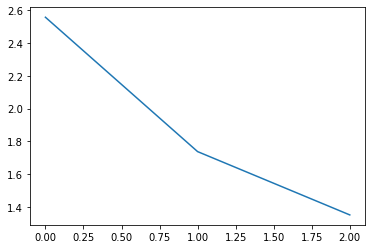

In [ ]:
hist.history['loss']

plt.plot(hist.history['loss'])

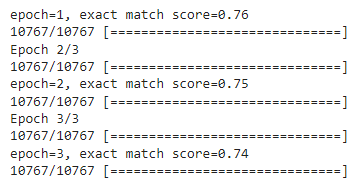

## Save/Load models

In [ ]:
# Save/Load models 
#full_model.save_weights('/content/drive/MyDrive/squadv1_trained_bert/checkpointFullModel.h5')
full_model.load_weights('/content/drive/MyDrive/squadv1_trained_bert/checkpointFullModel.h5')

"if run_unit_tests:\n  i = 0\n  for model_pt1, model_pt2 in partial_models:\n    model_pt1.save_weights('/content/drive/MyDrive/squadv1_trained_bert/checkpointPartialPreModel_' + str(i) + '.h5')\n    model_pt2.save_weights('/content/drive/MyDrive/squadv1_trained_bert/checkpointPartialPostModel_' + str(i) + '.h5')\n    i += 1\nelse:\n  full_model.load_weights('/content/drive/MyDrive/squadv1_trained_bert/checkpointFullModel.h5')\n  i = 0\n  for model_pt1, model_pt2 in partial_models:\n    model_pt1.load_weights('/content/drive/MyDrive/squadv1_trained_bert/checkpointPartialPreModel_' + str(i) + '.h5')\n    model_pt2.load_weights('/content/drive/MyDrive/squadv1_trained_bert/checkpointPartialPostModel_' + str(i) + '.h5')\n    i += 1"

In [ ]:
for model_pt1, model_pt2 in partial_models:
    assert np.all(np.isclose(
        full_model(test_input),
        model_pt2([model_pt1(test_input), test_input[1], test_input[2]])
    ))

In [ ]:
from transformers.modeling_tf_utils import input_processing

bert_model = TFBertModel.from_pretrained("bert-base-uncased")

test_input_embeds = input_embedder(test_input)
test_token_type_ids = tf.convert_to_tensor(test_input[1])
test_attention_mask = tf.convert_to_tensor(test_input[2])

expected_not_none_input = {'attention_mask': test_attention_mask,
                           'token_type_ids': test_token_type_ids,
                           'inputs_embeds': test_input_embeds, 
                           'return_dict': True,
                           'output_attentions': False,
                           'output_hidden_states': False,
                           'training': False,
                           'use_cache': True}

inputs = input_processing(
            func=bert_model.call,
            config=bert_model.config,
            input_ids=None,
            attention_mask=test_attention_mask,
            token_type_ids=test_token_type_ids,
            position_ids=None,
            head_mask=None,
            inputs_embeds=test_input_embeds,
            encoder_hidden_states=None,
            encoder_attention_mask=None,
            past_key_values=None,
            use_cache=None,
            output_attentions=None,
            output_hidden_states=None,
            return_dict=None,
            training=False,
            kwargs_call={}
        )

for k, v in inputs.items():
    if k in expected_not_none_input.keys():
        assert np.all(expected_not_none_input[k] == v)
    else:
        assert v is None

# Integrated Gradients Expanded

Inspirered by: https://www.tensorflow.org/tutorials/interpretability/integrated_gradients#compute_gradients

In [ ]:
def integrate_gradients_layer(baseline,
                              input_data,
                              input_target,
                              input_data_idx = 0,
                              steps = 50,
                              PreLayers = None, 
                              PostLayers = None):
  if PreLayers is None or PostLayers is None:
    print("Please the embedding layer as well as the remaining model")
    return

  if (len(input_data) != 3):
    print("Please send the x-eval as you would the model.")
    return
  
  #print("\tEntered sub-function ...")

  alphas = tf.linspace(0.0, 1.0, steps+1)

  # Send input_dataen igennem embedding laget for at få embeddings.
  # Ret senere, måske skal man specificere hvilket 'specifikt' eksempel
  # man vil tjekke.
  input_embeds = PreLayers([input_data[0][input_data_idx:input_data_idx+1],
                              input_data[1][input_data_idx:input_data_idx+1],
                              input_data[2][input_data_idx:input_data_idx+1]])

  embeddings = interpolate_embeddings(baseline, input_embeds[0], alphas)

  # Embeddings første dimension er nu (steps + 1)
  # men vores input er kun på én dimension lige nu - fikser det
  grad_comp_input = get_input(input_data[1:], input_data_idx, steps)

  start_grads, end_grads = compute_gradients(embeddings, grad_comp_input, input_target, input_data_idx, PostLayers)

  # approximate the integral
  start_grads = integral_approximation(start_grads)
  end_grads = integral_approximation(end_grads)

  # Normalize
  start_grads = tf.linalg.normalize(tf.norm(tf.multiply((input_embeds - baseline), start_grads), axis=2), ord=1, axis=1)[0]
  end_grads = tf.linalg.normalize(tf.norm(tf.multiply((input_embeds - baseline), end_grads), axis=2), ord=1, axis=1)[0]

  return start_grads, end_grads

def integrate_gradients_all(input_data,
                            input_target,
                            input_data_idx = 0,
                            steps = 50, 
                            models = None):
  if models is None:
    print("Models are not defined!")
    return
  # Etapler 'baseline' - defineret som 0-vektoren for embeddings 
  # (max_len, hidden_size).
  bl = tf.zeros((max_len, 768))

  sg_l = []
  eg_l = []

  for model_pt1, model_pt2 in partial_models:
    sg, eg = integrate_gradients_layer(bl, input_data, input_target, input_data_idx, steps, model_pt1, model_pt2)

    #sg = summarise(sg)
    #eg = summarise(eg)

    sg_l.append(sg)
    eg_l.append(eg)
  
  return sg_l, eg_l

# Interpoler med alpha over embeddings med en baseline.
def interpolate_embeddings(baseline,
                           embedding,
                           alphas):
  alphas_x = alphas[:, tf.newaxis, tf.newaxis]
  baseline_x = tf.expand_dims(baseline, axis=0)
  embeddings_x = tf.expand_dims(embedding, axis=0)
  delta = embeddings_x - baseline_x
  embeddings = baseline_x + alphas_x * delta
  return embeddings

# Komputer gradienter for de interpolerede embeddings!
def compute_gradients(embeddings,
                      input,
                      targets,
                      input_idx,
                      embed_based_model):
  assert len(input) == 2
  with tf.GradientTape(persistent=True) as tape:
    tape.watch(embeddings) # Vi sikrer os, at det holder øje!
    outputs = embed_based_model([embeddings, input[0], input[1]])

    #print(outputs[0][:,targets[0][input_idx]])
    #print(outputs[1][:,targets[0][input_idx]])

    probs_start = outputs[0][:,targets[0][input_idx]] #[:, y_eval[0][0]]   # Start token(s) sandsynligheden 
    probs_end = outputs[1][:,targets[1][input_idx]] #[:, y_eval[1][0]]     # Slut token(s) sandsynligheden

    #Gradienter for probs_start / -end ift embeddings
    grads_start = tape.gradient(probs_start, embeddings) 
    grads_end = tape.gradient(probs_end, embeddings)
  return grads_start, grads_end

# Få det på formen (2, steps+1, max_len)
def get_input(input,
              idx, 
              steps):
  dims = steps+1
  inp1 = []
  inp2 = []
  for i in range(dims):
    inp1.append(input[0][idx])
    inp2.append(input[1][idx])
  return tf.constant(inp1), tf.constant(inp2)

def summarise(attributions):
  attributions = tf.reduce_sum(attributions, axis=-1)
  attributions = attributions / tf.norm(attributions)
  return attributions

def integral_approximation(gradients):
  # riemann_trapezoidal
  grads = (gradients[:-1] + gradients[1:]) / tf.constant(2.0)
  integrated_gradients = tf.math.reduce_mean(grads, axis=0)
  return integrated_gradients

from IPython.display import display, HTML

# Source: https://github.com/ankurtaly/Integrated-Gradients/blob/master/howto.md#visualizing-the-attributions
def visualize_token_attrs(tokens, attrs):
  """
  Visualize attributions for given set of tokens.
  Args:
  - tokens: An array of tokens
  - attrs: An array of attributions, of same size as 'tokens',
    with attrs[i] being the attribution to tokens[i]
  
  Returns:
  - visualization: An IPython.core.display.HTML object showing
    tokens color-coded based on strength of their attribution.
  """
  def get_color(attr):
    if attr > 0:
      r = int(128*attr) + 127
      g = 128 - int(64*attr)
      b = 128 - int(64*attr) 
    else:
      r = 128 + int(64*attr)
      g = 128 + int(64*attr) 
      b = int(-128*attr) + 127
    return r,g,b

  # normalize attributions for visualization.
  bound = max(abs(tf.reduce_max(attrs)), abs(tf.reduce_min(attrs)))
  attrs = attrs/bound
  html_text = ""
  for i, tok in enumerate(tokens):
    if tok == 0:
      continue
    r,g,b = get_color(attrs[i])
    html_text += " <span style='color:rgb(%d,%d,%d)'>%s</span>" % (r, g, b, tok)
  return HTML(html_text)

def token_to_words(tokens):
  text = []
  for i, tok in enumerate(tokens):
    if tok == 101:
      text.append('[CLS]')
    elif tok == 102:
      text.append('[SEP]')
    else:
      text.append(tokenizer.decode([tok]))
  return text

In [ ]:
import time

In [ ]:
start = time.time()
idx = 573
steps = 10
sgs, egs = integrate_gradients_all(x_eval, y_eval, idx, steps, partial_models)
end = time.time()

print(end - start)


108.9460461139679


In [ ]:
# Visualise attributions per layer per word!
print("Visualiasing attributions per layer per word!:")
words = token_to_words(x_eval[0][idx])

for i in range(len(sgs)):

  st = sgs[i][0]
  en = egs[i][0]

  print("==" * 10)
  print("LAYER " + str(i+1) + "->:")
  print("==" * 10)
  print("\tStart Word Token Attributions:")
  display(visualize_token_attrs(words, st))
  print("\tEnd Word Token Attributions:")
  display(visualize_token_attrs(words, en))
print("True Answer:")
print(token_to_words(x_eval[0][idx][y_eval[0][idx]:y_eval[1][idx]+1]))
print("Token position for start/end")
print(y_eval[0][idx], y_eval[1][idx])
o = full_model([x_eval[0][idx:idx+1], x_eval[1][idx:idx+1], x_eval[2][idx:idx+1]])
print("Model S/E predictions:")
print(tf.math.argmax(o[0], axis=-1), " - ", tf.math.argmax(o[1], axis=-1))
print("Model Answer:")
print(token_to_words(x_eval[0][idx][tf.math.argmax(o[0], axis=-1)[0]:tf.math.argmax(o[1], axis=-1)[0]+1]))

Visualiasing attributions per layer per word!:
LAYER 1->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 2->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 3->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 4->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 5->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 6->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 7->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 8->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 9->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 10->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 11->:
	Start Word Token Attributions:


	End Word Token Attributions:


True Answer:
['death', 'wish', 'coffee']
Token position for start/end
15 17
Model S/E predictions:
tf.Tensor([33], shape=(1,), dtype=int64)  -  tf.Tensor([17], shape=(1,), dtype=int64)
Model Answer:
[]


## Top 5 Attributions per Layer

In [ ]:
import numpy as np

def find_answer_span_tokens(y_eval_data, index):
  """
    Returns indices of answer span
  """
  return np.arange(y_eval_data[0][index], y_eval_data[1][index]+1)

assert np.all(find_answer_span_tokens(np.array([[2,5], [4,6]]), 1) == np.array([5,6]))

def find_query_words_in_passage(x_eval, index):
  """
    Returns index of query words
  """
  passage = x_eval[0][index]
  start, end = np.argwhere(passage==102)
  query_toks = passage[start[0]+1:end[0]]
  passage = passage[0: start[0]]

  def predicate(passage):
    
    ans = np.zeros(passage.shape, dtype=np.bool)

    for i, e in enumerate(passage):
      ans[i] = e in query_toks

    return ans

  return np.argwhere(predicate(passage)).ravel()

assert np.all(find_query_words_in_passage(np.array([[[5,4,10,102,5,4,102],[0,1,1,1,1,1,1], [1,1,1,1,1,1,1]]]),0) == np.array([0,1]))

def find_support_tokens(answer_start, answer_end, passage):
  start, end = np.argwhere(passage==102)
  passage = passage[0: start[0]]

  first_span_start = max(0, answer_start-5)
  last_span_end = min(len(passage)-1, answer_end+5)

  
  return np.hstack((np.arange(first_span_start,answer_start),
                    np.arange(answer_end+1,last_span_end+1)))


def get_token_types(x_eval, y_eval, index):
  answer_tokens = find_answer_span_tokens(y_eval, index)
  query_tokens = find_query_words_in_passage(x_eval, index)
  support_tokens = find_support_tokens(y_eval[0][index], 
                                       y_eval[1][index], 
                                       x_eval[0][index])
  
  return answer_tokens, query_tokens, support_tokens

ut = np.array(get_token_types(
        x_eval=np.array([[[10,9,4,5,102,5,4,102],[0,0,0,0,1,1,1,1], [1,1,1,1,1,1,1,1]]]),
        y_eval=np.array([[1],[3]]),
        index=0
    ))
assert np.all(ut[0] == np.array([1,2,3])) and np.all(ut[1] == np.array([2,3]))\
  and np.all(ut[2] == np.array([0]))

ut = np.array(get_token_types(
      x_eval=np.array([[[10,9,8,7,6,4,5,1,2,3,6,7,8,102,5,4,102]]]),
      y_eval=np.array([[5],[7]]),
      index=0))
assert np.all(ut[0] == np.array([5,6,7])) and np.all(ut[1] == np.array([5,6]))\
  and np.all(ut[2] == np.array([0,1,2,3,4,8,9,10,11,12]))

def find_top_five_attributions(sgs, egs):
  
  l_top_start = []
  l_top_end   = []

  for i in range(len(sgs)):
    
    l_top_start.append(np.argsort(sgs[i][0])[-5:])
    l_top_end.append(np.argsort(egs[i][0])[-5:])
  
  return l_top_start, l_top_end

ut = find_top_five_attributions(np.array([[[0,0,2,3,4,5,6,0,0,0]], [[0,0,2,3,4,5,6,7,8,0]]]),np.array([[[0,2,1,3,4,5,6,0,0,0]], [[0,3,2,1,4,5,0,7,6,0]]]))
assert np.all(ut[0][0] == np.array([2,3,4,5,6]))\
  and np.all(ut[0][1] == np.array([4,5,6,7,8]))\
  and np.all(ut[1][0] == np.array([1,3,4,5,6]))\
  and np.all(ut[1][1] == np.array([1,4,5,8,7]))

ut = get_token_types(
      x_eval=np.array([[[10,9,8,7,6,4,5,1,2,3,6,7,8,102,5,4,102]]]),
      y_eval=np.array([[5],[7]]),
      index=0)

def find_aqs_counts(t5sgs, t5egs, answer_toks_idxs, support_toks_idxs, query_toks_idxs):

  def predi_fun(passage, pattern):
    ans = np.zeros(pattern.shape, dtype=np.bool)

    for i, e in enumerate(pattern):
      ans[i] = e in passage
  
    return ans

  SCount = []
  ECount = []

  for i in range(len(t5sgs)):
    eg = t5egs[i]
    sg = t5sgs[i]

    numSA = np.sum(predi_fun(sg, answer_toks_idxs))       # Answers in top 5
    numSQ = np.sum(predi_fun(sg, support_toks_idxs))      # Queries in top 5 
    numSS = np.sum(predi_fun(sg, query_toks_idxs))        # Support in top 5

    numEA = np.sum(predi_fun(eg, answer_toks_idxs))
    numEQ = np.sum(predi_fun(eg, support_toks_idxs))
    numES = np.sum(predi_fun(eg, query_toks_idxs))

    SCount.append((numSA, numSQ, numSS))
    ECount.append((numEA, numEQ, numES))
  
  return SCount, ECount

def get_aqs_percentages(sCount, eCount, a_length, q_length, s_length):
  percentages_s = []
  percentages_e = []

  for s, e in zip(sCount, eCount):

    perSA = s[0]/a_length
    perSQ = s[1]/q_length
    perSS = s[2]/s_length

    perEA = e[0]/a_length
    perEQ = e[1]/q_length
    perES = e[2]/s_length

    percentages_s.append((perSA, perSQ, perSS))
    percentages_e.append((perEA, perEQ, perES))
  
  return percentages_s, percentages_e



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
ut = find_top_five_attributions(np.array([[[0,0,2,3,4,5,6,0,0,0]], [[0,0,2,3,4,5,6,5,4,0]]]),np.array([[[0,3,2,3,3,3,3,0,0,0]], [[0,3,2,1,4,5,6,5,7,0]]]))
print(ut)

([array([2, 3, 4, 5, 6]), array([4, 8, 5, 7, 6])], [array([1, 3, 4, 5, 6]), array([4, 5, 7, 6, 8])])


In [ ]:
np.array(get_token_types(
        x_eval=np.array([[[10,9,4,5,102,5,4,102],[0,0,0,0,1,1,1,1], [1,1,1,1,1,1,1,1]]]),
        y_eval=np.array([[1],[3]]),
        index=0
    ))

In [ ]:
np.array((np.array([1,2,3]), np.array([2,3]), np.array([0])))

In [ ]:
a, q, s = get_token_types(x_eval, y_eval, idx)
t5s, t5e = find_top_five_attributions(sgs, egs)
sCount, eCount = find_aqs_counts(t5s, t5e, a, s, q)
ps, pe = get_aqs_percentages(sCount, eCount, len(a), len(q), len(s))

In [ ]:
steps = 10
idx = 0
num = 2

pss = []
pes = []

for i in np.arange(start=0, stop=len(x_eval[0]), step=len(x_eval[0])/num, dtype=np.int):
  print("Integrated Gradients on x_eval index " + str(i) + "!")
  sgs, egs = integrate_gradients_all(x_eval, y_eval, i, steps, partial_models)
  a, q, s = get_token_types(x_eval, y_eval, idx)
  t5s, t5e = find_top_five_attributions(sgs, egs)
  sCount, eCount = find_aqs_counts(t5s, t5e, a, s, q)
  ps, pe = get_aqs_percentages(sCount, eCount, len(a), len(q), len(s))
  pss.append(ps)
  pes.append(pe)
  idx = i
  #print(i)

print("Visualiasing attributions per layer per word!:")
words = token_to_words(x_eval[0][idx])

for i in range(len(sgs)):

  st = sgs[i][0]
  en = egs[i][0]

  print("==" * 10)
  print("LAYER " + str(i+1) + "->:")
  print("==" * 10)
  print("\tStart Word Token Attributions:")
  display(visualize_token_attrs(words, st))
  print("\tEnd Word Token Attributions:")
  display(visualize_token_attrs(words, en))
print("True Answer:")
print(token_to_words(x_eval[0][idx][y_eval[0][idx]:y_eval[1][idx]+1]))
print("Token position for start/end")
print(y_eval[0][idx], y_eval[1][idx])
o = full_model([x_eval[0][idx:idx+1], x_eval[1][idx:idx+1], x_eval[2][idx:idx+1]])
print("Model S/E predictions:")
print(tf.math.argmax(o[0], axis=-1), " - ", tf.math.argmax(o[1], axis=-1))
print("Model Answer:")
print(token_to_words(x_eval[0][idx][tf.math.argmax(o[0], axis=-1)[0]:tf.math.argmax(o[1], axis=-1)[0]+1]))

Integrated Gradients on x_eval index 0!
Integrated Gradients on x_eval index 5165!
Visualiasing attributions per layer per word!:
LAYER 1->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 2->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 3->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 4->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 5->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 6->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 7->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 8->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 9->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 10->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 11->:
	Start Word Token Attributions:


	End Word Token Attributions:


True Answer:
['over', '37', 'million']
Token position for start/end
121 123
Model S/E predictions:
tf.Tensor([121], shape=(1,), dtype=int64)  -  tf.Tensor([123], shape=(1,), dtype=int64)
Model Answer:
['over', '37', 'million']


In [ ]:
# OLD, DON'T RERUN

steps = 10
idx = 0

pss = []
pes = []

for i in np.arange(start=0, stop=len(x_eval[0]), step=len(x_eval[0])/100, dtype=np.int):
  print("Integrated Gradients on x_eval index " + str(i) + "!")
  sgs, egs = integrate_gradients_all(x_eval, y_eval, i, steps, partial_models)
  a, q, s = get_token_types(x_eval, y_eval, idx)
  t5s, t5e = find_top_five_attributions(sgs, egs)
  sCount, eCount = find_aqs_counts(t5s, t5e, a, s, q)
  ps, pe = get_aqs_percentages(sCount, eCount)
  pss.append(ps)
  pes.append(pe)
  idx = i
  #print(i)

print("Visualiasing attributions per layer per word!:")
words = token_to_words(x_eval[0][idx])

for i in range(len(sgs)):

  st = sgs[i][0]
  en = egs[i][0]

  print("==" * 10)
  print("LAYER " + str(i+1) + "->:")
  print("==" * 10)
  print("\tStart Word Token Attributions:")
  display(visualize_token_attrs(words, st))
  print("\tEnd Word Token Attributions:")
  display(visualize_token_attrs(words, en))
print("True Answer:")
print(token_to_words(x_eval[0][idx][y_eval[0][idx]:y_eval[1][idx]+1]))
print("Token position for start/end")
print(y_eval[0][idx], y_eval[1][idx])
o = full_model([x_eval[0][idx:idx+1], x_eval[1][idx:idx+1], x_eval[2][idx:idx+1]])
print("Model S/E predictions:")
print(tf.math.argmax(o[0], axis=-1), " - ", tf.math.argmax(o[1], axis=-1))
print("Model Answer:")
print(token_to_words(x_eval[0][idx][tf.math.argmax(o[0], axis=-1)[0]:tf.math.argmax(o[1], axis=-1)[0]+1]))

Integrated Gradients on x_eval index 0!
Integrated Gradients on x_eval index 103!
Integrated Gradients on x_eval index 206!
Integrated Gradients on x_eval index 309!
Integrated Gradients on x_eval index 412!
Integrated Gradients on x_eval index 515!
Integrated Gradients on x_eval index 618!
Integrated Gradients on x_eval index 721!
Integrated Gradients on x_eval index 824!
Integrated Gradients on x_eval index 927!
Integrated Gradients on x_eval index 1030!
Integrated Gradients on x_eval index 1133!
Integrated Gradients on x_eval index 1236!
Integrated Gradients on x_eval index 1339!
Integrated Gradients on x_eval index 1442!
Integrated Gradients on x_eval index 1545!
Integrated Gradients on x_eval index 1648!
Integrated Gradients on x_eval index 1751!
Integrated Gradients on x_eval index 1854!
Integrated Gradients on x_eval index 1957!
Integrated Gradients on x_eval index 2060!
Integrated Gradients on x_eval index 2163!
Integrated Gradients on x_eval index 2266!
Integrated Gradients on

	End Word Token Attributions:


LAYER 2->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 3->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 4->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 5->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 6->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 7->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 8->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 9->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 10->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 11->:
	Start Word Token Attributions:


	End Word Token Attributions:


True Answer:
['gravity']
Token position for start/end
84 84
Model S/E predictions:
tf.Tensor([84], shape=(1,), dtype=int64)  -  tf.Tensor([84], shape=(1,), dtype=int64)
Model Answer:
['gravity']


In [ ]:
t5s

[array([169, 167, 176, 172,  84]),
 array([ 83,  85,  82,  84, 172]),
 array([171, 172,  85,  82,  84]),
 array([ 99, 172,  84, 179, 161]),
 array([179, 161,  82,  51,  84]),
 array([179, 161,  87,  51,  84]),
 array([171,  82, 179, 161,  84]),
 array([161, 172, 171,  56,  84]),
 array([ 98,  82, 172,  56,  84]),
 array([54, 98, 55, 56, 84]),
 array([55, 81, 82, 56, 84])]

In [ ]:
t5e

[array([169,  48,  84, 176, 172]),
 array([ 86, 171,  85, 172,  84]),
 array([ 99, 172, 171,  82,  84]),
 array([172,  98,  84, 179, 161]),
 array([ 82, 179, 161,  51,  84]),
 array([58, 82, 87, 51, 84]),
 array([171, 172, 179, 161,  84]),
 array([ 89, 171, 172,  58,  84]),
 array([171,  98,  58, 172,  84]),
 array([172,  59,  98,  58,  84]),
 array([88, 98, 59, 58, 84])]

In [ ]:
start_a_probs = np.zeros(11, dtype=np.float)
start_s_probs = np.zeros(11, dtype=np.float)
start_q_probs = np.zeros(11, dtype=np.float)

end_a_probs = np.zeros(11, dtype=np.float)
end_s_probs = np.zeros(11, dtype=np.float)
end_q_probs = np.zeros(11, dtype=np.float)

for elemss, elemes in zip(pss, pes):
  for i, elem in enumerate(elemss):
    start_a_probs[i] += elem[0]
    start_s_probs[i] += elem[1]
    start_q_probs[i] += elem[2]

  for i, elem in enumerate(elemes):
    end_a_probs[i] += elem[0]
    end_s_probs[i] += elem[1]
    end_q_probs[i] += elem[2]


start_a_probs = start_a_probs / num * 100
start_s_probs = start_s_probs / num * 100
start_q_probs = start_q_probs / num * 100

end_a_probs = end_a_probs / num * 100
end_s_probs = end_s_probs / num * 100
end_q_probs = end_q_probs / num * 100

print("Layer-Wise Percentage of top 5 attributions in \
(Answer-span, Support Words, Query Words)")


print("For start words")
print("A:", start_a_probs)
print("S:", start_s_probs)
print("Q:", start_q_probs)

print("For end words")
print("A:", end_a_probs)
print("S:", end_s_probs)
print("Q:", end_q_probs)

Layer-Wise Percentage of top 5 attributions in (Answer-span, Support Words, Query Words)
For start words
A: [20. 10. 20. 20. 20. 20. 20. 10. 10. 20. 10.]
S: [0.         0.64516129 0.64516129 0.         0.         0.
 0.         0.         0.72727273 0.36363636 1.37243402]
Q: [10. 12. 14. 12. 16. 12. 14. 16. 12. 18. 22.]
For end words
A: [10. 15. 20. 10. 10. 10. 10. 10. 10. 20. 20.]
S: [2.01759531 1.37243402 1.73607038 1.09090909 1.09090909 0.72727273
 0.72727273 1.00879765 1.73607038 1.09090909 1.09090909]
Q: [6. 6. 4. 2. 4. 6. 6. 2. 4. 8. 2.]


In [ ]:
# Visualise attributions per layer per word! (ORIGINAL, BEFORE NORMALIZING)
print("Visualiasing attributions per layer per word!:")

words = token_to_words(x_eval[0][idx])

for i in range(len(sgs)):

  st = sgs[i]
  en = egs[i]

  print("==" * 10)
  print("LAYER " + str(i+1) + "->:")
  print("==" * 10)
  print("\tStart Word Token Attributions:")
  display(visualize_token_attrs(words, st))
  print("\tEnd Word Token Attributions:")
  display(visualize_token_attrs(words, en))
print("True Answer:")
print(token_to_words(x_eval[0][idx][y_eval[0][idx]:y_eval[1][idx]+1]))
print("Token position for start/end")
print(y_eval[0][idx], y_eval[1][idx])
o = full_model([x_eval[0][idx:idx+1], x_eval[1][idx:idx+1], x_eval[2][idx:idx+1]])
print("Model S/E predictions:")
print(tf.math.argmax(o[0], axis=-1), " - ", tf.math.argmax(o[1], axis=-1))
print("Model Answer:")
print(token_to_words(x_eval[0][idx][tf.math.argmax(o[0], axis=-1)[0]:tf.math.argmax(o[1], axis=-1)[0]+1]))

Visualiasing attributions per layer per word!:
LAYER 1->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 2->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 3->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 4->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 5->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 6->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 7->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 8->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 9->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 10->:
	Start Word Token Attributions:


	End Word Token Attributions:


LAYER 11->:
	Start Word Token Attributions:


	End Word Token Attributions:


True Answer:
['denver', 'broncos']
Token position for start/end
34 35
Model S/E predictions:
tf.Tensor([34], shape=(1,), dtype=int64)  -  tf.Tensor([35], shape=(1,), dtype=int64)
Model Answer:
['denver', 'broncos']


# Data analysis

In [ ]:
def to_raw(text_arr):
  
  txt = ""
  
  for i in range(len(text_arr)):
    if text_arr[i] == '[CLS]':
      continue
    else:
      txt += text_arr[i]+' '
  
  return txt

In [ ]:
to_raw(token_to_words(x_eval[0][idx]))

'quick ##books sponsored a " small business big game " contest , in which death wish coffee had a 30 - second commercial aired free of charge courtesy of quick ##books . death wish coffee beat out nine other contenders from across the united states for the free advertisement . [SEP] who won the competition to get a free super bowl commercial aired ? [SEP]                                                                                                                                                                                                                                                                                                                               '

# Integrated Gradients (Like GitHub)

In [ ]:
def integrate_gradients_layer(baseline,
                              input_data,
                              input_target,
                              input_data_idx = 0,
                              steps = 50,
                              PreLayers = None, 
                              PostLayers = None):
  if PreLayers is None or PostLayers is None:
    print("Please the embedding layer as well as the remaining model")
    return

  if (len(input_data) != 3):
    print("Please send the x-eval as you would the model.")
    return
  
  #print("\tEntered sub-function ...")

  alphas = tf.linspace(0.0, 1.0, steps+1)

  # Send input_dataen igennem embedding laget for at få embeddings.
  # Ret senere, måske skal man specificere hvilket 'specifikt' eksempel
  # man vil tjekke.
  input_embeds = PreLayers([input_data[0][input_data_idx:input_data_idx+1],
                              input_data[1][input_data_idx:input_data_idx+1],
                              input_data[2][input_data_idx:input_data_idx+1]])

  embeddings = interpolate_embeddings(baseline, input_embeds[0], alphas)

  # Embeddings første dimension er nu (steps + 1)
  # men vores input er kun på én dimension lige nu - fikser det
  grad_comp_input = get_input(input_data[1:], input_data_idx, steps)

  grads = compute_gradients(embeddings, grad_comp_input, input_target, input_data_idx, PostLayers)

  # approximate the integral
  grads = integral_approximation(grads)

  # Normalize
  grads = tf.linalg.normalize(tf.norm(tf.multiply((input_embeds - baseline), grads), axis=2), ord=1, axis=1)[0]

  return grads

def integrate_gradients_all(input_data,
                            input_target,
                            input_data_idx = 0,
                            steps = 50, 
                            models = None):
  if models is None:
    print("Models are not defined!")
    return
  # Etapler 'baseline' - defineret som 0-vektoren for embeddings 
  # (max_len, hidden_size).
  bl = tf.zeros((max_len, 768))

  grads = []

  for model_pt1, model_pt2 in partial_models:
    grad = integrate_gradients_layer(bl, input_data, input_target, input_data_idx, steps, model_pt1, model_pt2)

    grads.append(grad)
  
  return grads

# Interpoler med alpha over embeddings med en baseline.
def interpolate_embeddings(baseline,
                           embedding,
                           alphas):
  alphas_x = alphas[:, tf.newaxis, tf.newaxis]
  baseline_x = tf.expand_dims(baseline, axis=0)
  embeddings_x = tf.expand_dims(embedding, axis=0)
  delta = embeddings_x - baseline_x
  embeddings = baseline_x + alphas_x * delta
  return embeddings

# Komputer gradienter for de interpolerede embeddings!
def compute_gradients(embeddings,
                      input,
                      targets,
                      input_idx,
                      embed_based_model):
  assert len(input) == 2
  with tf.GradientTape(persistent=True) as tape:
    
    tape.watch(embeddings) # Vi sikrer os, at det holder øje!
    outputs = embed_based_model([embeddings, input[0], input[1]])

    probs_start = outputs[0][:,targets[0][input_idx]] #[:, y_eval[0][0]]   # Start token(s) sandsynligheden 
    probs_end = outputs[1][:,targets[1][input_idx]] #[:, y_eval[1][0]]     # Slut token(s) sandsynligheden

    # Gradienter for probs_start / -end ift embeddings
    grads_start = tape.gradient(probs_start, embeddings) 
    grads_end = tape.gradient(probs_end, embeddings)

    grads = tf.math.add(grads_start, grads_end)
  return grads
# Få det på formen (2, steps+1, max_len)
def get_input(input,
              idx, 
              steps):
  dims = steps+1
  inp1 = []
  inp2 = []
  for i in range(dims):
    inp1.append(input[0][idx])
    inp2.append(input[1][idx])
  return tf.constant(inp1), tf.constant(inp2)

def summarise(attributions):
  attributions = tf.reduce_sum(attributions, axis=-1)
  attributions = attributions / tf.norm(attributions)
  return attributions

def integral_approximation(gradients):
  # riemann_trapezoidal
  grads = (gradients[:-1] + gradients[1:]) / tf.constant(2.0)
  integrated_gradients = tf.math.reduce_mean(grads, axis=0)
  return integrated_gradients

from IPython.display import display, HTML

# Source: https://github.com/ankurtaly/Integrated-Gradients/blob/master/howto.md#visualizing-the-attributions
def visualize_token_attrs(tokens, attrs):
  """
  Visualize attributions for given set of tokens.
  Args:
  - tokens: An array of tokens
  - attrs: An array of attributions, of same size as 'tokens',
    with attrs[i] being the attribution to tokens[i]
  
  Returns:
  - visualization: An IPython.core.display.HTML object showing
    tokens color-coded based on strength of their attribution.
  """
  
  def get_color(attr):
    if attr > 0:
      r = int(128*attr) + 127
      g = 128 - int(64*attr)
      b = 128 - int(64*attr) 
    else:
      r = 128 + int(64*attr)
      g = 128 + int(64*attr) 
      b = int(-128*attr) + 127
    return r,g,b

  # normalize attributions for visualization.
  bound = max(abs(tf.reduce_max(attrs)), abs(tf.reduce_min(attrs)))
  attrs = (attrs/bound)[0]
  html_text = ""
  for i, tok in enumerate(tokens):
    if tok == 0:
      continue
    r,g,b = get_color(attrs[i])
    html_text += " <span style='color:rgb(%d,%d,%d)'>%s</span>" % (r, g, b, tok)
  return HTML(html_text)

def token_to_words(tokens):
  text = []
  for i, tok in enumerate(tokens):
    if tok == 101:
      text.append('[CLS]')
    elif tok == 102:
      text.append('[SEP]')
    else:
      text.append(tokenizer.decode([tok]))
  return text


####################
###  UNIT TESTS  ###
####################

alphas = tf.linspace(0.0, 1.0, 4)

# interpolation unit test
test_embeds = interpolate_embeddings([0.0], [[1.0],[1.0],[1.0]], alphas)
assert np.all(np.isclose(test_embeds.numpy(), np.array([[[[0.0]], [[1/3.0]], [[2/3.0]], [[1.0]]]])))

# compute_gradients unit test

input_ids = layers.Input(shape=(3,1), dtype=tf.float32, name='input_input_ids')
token_type_ids = layers.Input(shape=(3,), dtype=tf.float32, name='input_token_type_ids')
attention_mask = layers.Input(shape=(3,), dtype=tf.float32, name='input_attention_mask')
original_input_layer = [input_ids, token_type_ids, attention_mask]

start_layers = tf.keras.layers.Dense(1, None, False)(input_ids)
start_layers = tf.keras.layers.Flatten()(start_layers)

end_layers = tf.keras.layers.Dense(1, None, False)(input_ids)
end_layers = tf.keras.layers.Flatten()(end_layers)

test_model = tf.keras.Model(inputs=original_input_layer, outputs=[start_layers, end_layers])
test_model([test_embeds, tf.constant([[3.0,3.0,3.0]]), tf.constant([[1.0,1.0,1.0]])])
test_model.layers[1].weights[0].assign(tf.constant([[3.0]]))
test_model.layers[2].weights[0].assign(tf.constant([[2.0]]))
# print("FM: ", test_model([test_embeds, tf.constant([[3.0,3.0,3.0]]), tf.constant([[1.0,1.0,1.0]])]))

gradsTest = compute_gradients(test_embeds,
                                [tf.constant([[3.0,3.0,3.0]]), tf.constant([[1.0,1.0,1.0]])],
                                tf.constant([[1],[2]]), 
                                0, 
                                test_model)
# print("Grads: ", gradsTest)
assert np.all(gradsTest.numpy() == np.array([[[0.0],[3.0],[2.0]]]))



# Integral Appoximation unit test
# print(integral_approximation(gradsTest))

assert np.all(tf.equal(integral_approximation(gradsTest), tf.constant([[0.0],[3.0],[2.0]])))

In [ ]:
test_model.layers[1].weights[0]

<tf.Variable 'dense_198/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>

In [ ]:
start_layers(np.array([[1,2,3], [0,0,0], [0,0,0]]))
#start_layers(np.array([[1,2,3], [0,0,0], [0,0,0]]))

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.86540604],
       [0.        ],
       [0.        ]], dtype=float32)>

# Top 5 Attributions (summed grad):

In [ ]:
import numpy as np

def find_answer_span_tokens(y_eval_data, index):
  """
    Returns indices of answer span
  """
  return np.arange(y_eval_data[0][index], y_eval_data[1][index]+1)

def find_query_words_in_passage(x_eval, index):
  """
    Returns index of query words
  """
  passage = x_eval[0][index]
  start, end = np.argwhere(passage==102)
  query_toks = passage[start[0]+1:end[0]]
  passage = passage[0: start[0]]

  def predicate(passage):
    
    ans = np.zeros(passage.shape, dtype=np.bool)

    for i, e in enumerate(passage):
      ans[i] = e in query_toks

    return ans

  return np.argwhere(predicate(passage)).ravel()

def find_support_tokens(answer_start, answer_end, passage):
  start, end = np.argwhere(passage==102)
  passage = passage[0: start[0]]

  first_span_start = max(0, answer_start-5)
  last_span_end = min(len(passage)-1, answer_end+5)

  
  return np.hstack((np.arange(first_span_start,answer_start),
                    np.arange(answer_end+1,last_span_end+1)))


def get_token_types(x_eval, y_eval, index):
  answer_tokens = find_answer_span_tokens(y_eval, index)
  query_tokens = find_query_words_in_passage(x_eval, index)
  support_tokens = find_support_tokens(y_eval[0][index], 
                                       y_eval[1][index], 
                                       x_eval[0][index])
  
  return answer_tokens, query_tokens, support_tokens

def find_top_five_attributions(grad):
  
  l_top_start = []

  for i in range(len(sgs)):
    
    l_top_start.append(np.argsort(grad[i][0])[-5:])
  
  return l_top_start

def find_aqs_counts(t5sgs, answer_toks_idxs, support_toks_idxs, query_toks_idxs):

  def predi_fun(passage, pattern):
    ans = np.zeros(pattern.shape, dtype=np.bool)

    for i, e in enumerate(pattern):
      ans[i] = e in passage
  
    return ans

  SCount = []

  for i in range(len(t5sgs)):
    sg = t5sgs[i]

    numSA = np.sum(predi_fun(sg, answer_toks_idxs))       # Answers in top 5
    numSQ = np.sum(predi_fun(sg, support_toks_idxs))      # Queries in top 5 
    numSS = np.sum(predi_fun(sg, query_toks_idxs))        # Support in top 5

    SCount.append((numSA, numSQ, numSS))
  
  return SCount

def get_aqs_percentages(sCount, a_length, q_length, s_length):
  percentages_s = []

  for s in sCount:

    perSA = s[0]/a_length
    perSQ = s[1]/q_length
    perSS = s[2]/s_length

    percentages_s.append((perSA, perSQ, perSS))
  
  return percentages_s



# Testing

In [ ]:
# OLD VERISON
idx = 353
steps = 3

sgs, egs = integrate_gradients_all(x_eval, y_eval, idx, steps, partial_models)

# Visualise attributions per layer per word!
print("Visualiasing attributions per layer per word!:")
words = token_to_words(x_eval[0][idx])

for i in range(len(sgs)):

  st = sgs[i][0]
  en = egs[i][0]

  print("==" * 10)
  print("LAYER " + str(i+1) + "->:")
  print("==" * 10)
  print("\tStart Word Token Attributions:")
  display(visualize_token_attrs(words, st))
  print("\tEnd Word Token Attributions:")
  display(visualize_token_attrs(words, en))
print("True Answer:")
print(token_to_words(x_eval[0][idx][y_eval[0][idx]:y_eval[1][idx]+1]))
print("Token position for start/end")
print(y_eval[0][idx], y_eval[1][idx])
o = full_model([x_eval[0][idx:idx+1], x_eval[1][idx:idx+1], x_eval[2][idx:idx+1]])
print("Model S/E predictions:")
print(tf.math.argmax(o[0], axis=-1), " - ", tf.math.argmax(o[1], axis=-1))
print("Model Answer:")
print(token_to_words(x_eval[0][idx][tf.math.argmax(o[0], axis=-1)[0]:tf.math.argmax(o[1], axis=-1)[0]+1]))

KeyboardInterrupt: ignored

In [ ]:
# NEW VERSION (Single)

idx = 0
steps = 10
grads = integrate_gradients_all(x_eval, y_eval, idx, steps, partial_models)

words = token_to_words(x_eval[0][idx])

for i in range(len(grads)):

  print("==" * 10)
  print("LAYER " + str(i+1) + "->:")
  print("==" * 10)
  print("\tToken Attributions:")
  display(visualize_token_attrs(words, grads[i]))

print("True Answer:")
print(token_to_words(x_eval[0][idx][y_eval[0][idx]:y_eval[1][idx]+1]))
print("Token position for start/end")
print(y_eval[0][idx], y_eval[1][idx])
o = full_model([x_eval[0][idx:idx+1], x_eval[1][idx:idx+1], x_eval[2][idx:idx+1]])
print("Model S/E predictions:")
print(tf.math.argmax(o[0], axis=-1), " - ", tf.math.argmax(o[1], axis=-1))
print("Model Answer:")
print(token_to_words(x_eval[0][idx][tf.math.argmax(o[0], axis=-1)[0]:tf.math.argmax(o[1], axis=-1)[0]+1]))

tf.Tensor(
[9.4621629e-03 7.6711439e-03 6.2742783e-03 1.2441709e-02 3.0764216e-03
 2.3301973e-03 5.2184355e-03 6.4498433e-03 4.0091746e-03 1.4132900e-03
 3.3942575e-03 2.4868145e-03 4.5895278e-03 1.5616692e-03 1.1711621e-03
 2.7163906e-03 4.8894822e-03 4.7447728e-03 2.4360428e-03 8.7738940e-03
 3.0957377e-03 1.7011994e-03 1.9725102e-03 2.4254399e-03 2.0845127e-03
 3.7587900e-03 8.2621463e-03 9.6289273e-03 5.1108361e-03 1.1080503e-02
 2.0075424e-02 3.1752098e-02 2.6306372e-02 3.2844763e-02 3.7004806e-02
 5.1382501e-02 2.2946639e-02 6.7552477e-03 6.7883665e-03 4.6329033e-03
 7.7203801e-03 1.3554500e-02 4.5229349e-02 1.7482916e-02 1.8834664e-02
 2.5323609e-02 4.7430500e-02 1.6310856e-02 5.1050009e-03 6.6126399e-03
 3.3787473e-03 7.5065088e-03 3.5628004e-03 4.1336124e-03 7.4047926e-03
 5.4662991e-03 5.7729483e-03 6.1943545e-03 1.7718871e-03 2.6138867e-03
 1.4371153e-03 4.5760307e-03 1.7412418e-03 1.4642421e-03 1.1569380e-03
 1.3815433e-03 1.3902095e-03 5.2359221e-03 1.9359993e-03 1.2018339

LAYER 2->:
	Token Attributions:


LAYER 3->:
	Token Attributions:


LAYER 4->:
	Token Attributions:


LAYER 5->:
	Token Attributions:


LAYER 6->:
	Token Attributions:


LAYER 7->:
	Token Attributions:


LAYER 8->:
	Token Attributions:


LAYER 9->:
	Token Attributions:


LAYER 10->:
	Token Attributions:


LAYER 11->:
	Token Attributions:


True Answer:
['denver', 'broncos']
Token position for start/end
34 35
Model S/E predictions:
tf.Tensor([34], shape=(1,), dtype=int64)  -  tf.Tensor([35], shape=(1,), dtype=int64)
Model Answer:
['denver', 'broncos']


In [ ]:
a, q, s = get_token_types(x_eval, y_eval, idx)
t5s = find_top_five_attributions(grads)
print(ps)
sCount = find_aqs_counts(t5s, a, s, q)
ps = get_aqs_percentages(sCount, len(a), len(q), len(s))
print(ps)

[(1.0, 0.03225806451612903, 0.0), (1.0, 0.0, 0.0), (1.0, 0.03225806451612903, 0.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (1.0, 0.03225806451612903, 0.0)]
[(1.0, 0.03225806451612903, 0.0), (1.0, 0.0, 0.0), (1.0, 0.03225806451612903, 0.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (1.0, 0.03225806451612903, 0.0)]


In [ ]:
# NEWER VERSION (num samples)

steps = 10
num = 50

pss = []

for i in np.arange(start=0, stop=len(x_eval[0]), step=len(x_eval[0])/num, dtype=np.int):
  print("Integrated Gradients on x_eval index " + str(i) + "!")
  sgs = integrate_gradients_all(x_eval, y_eval, i, steps, partial_models)
  a, q, s = get_token_types(x_eval, y_eval, i)
  t5s = find_top_five_attributions(sgs)
  sCount = find_aqs_counts(t5s, a, s, q)
  ps = get_aqs_percentages(sCount, len(a), len(q), len(s))
  pss.append(ps)

print(pss)

Integrated Gradients on x_eval index 0!
Integrated Gradients on x_eval index 206!
Integrated Gradients on x_eval index 412!
Integrated Gradients on x_eval index 618!
Integrated Gradients on x_eval index 824!
Integrated Gradients on x_eval index 1030!
Integrated Gradients on x_eval index 1236!
Integrated Gradients on x_eval index 1442!
Integrated Gradients on x_eval index 1648!
Integrated Gradients on x_eval index 1854!
Integrated Gradients on x_eval index 2060!
Integrated Gradients on x_eval index 2266!
Integrated Gradients on x_eval index 2472!
Integrated Gradients on x_eval index 2678!
Integrated Gradients on x_eval index 2884!
Integrated Gradients on x_eval index 3090!
Integrated Gradients on x_eval index 3296!
Integrated Gradients on x_eval index 3502!
Integrated Gradients on x_eval index 3708!
Integrated Gradients on x_eval index 3914!
Integrated Gradients on x_eval index 4120!
Integrated Gradients on x_eval index 4326!
Integrated Gradients on x_eval index 4532!
Integrated Gradien

In [ ]:

layer_percentage = np.zeros((11, 3))

for layer_percentages in pss:
  for i, (pa, ps, pq) in enumerate(layer_percentages):
    layer_percentage[i][0] += pa
    layer_percentage[i][1] += ps
    layer_percentage[i][2] += pq

for i in range(len(layer_percentage)):
  layer_percentage[i][0] /= num
  layer_percentage[i][1] /= num
  layer_percentage[i][2] /= num

for i, per in enumerate(layer_percentage):
  print("LAYER ", str(i+1), " PERCENTAGES (answer, support, query):")
  print(" ", per)

LAYER  1  PERCENTAGES (answer, support, query):
  [0.79977113 0.0643624  0.06772222]
LAYER  2  PERCENTAGES (answer, support, query):
  [0.8419378  0.08423935 0.071     ]
LAYER  3  PERCENTAGES (answer, support, query):
  [0.81973285 0.07823326 0.07183333]
LAYER  4  PERCENTAGES (answer, support, query):
  [0.8137185  0.06190734 0.07116667]
LAYER  5  PERCENTAGES (answer, support, query):
  [0.82408134 0.09654634 0.08738889]
LAYER  6  PERCENTAGES (answer, support, query):
  [0.81197608 0.0801432  0.09033333]
LAYER  7  PERCENTAGES (answer, support, query):
  [0.76502871 0.05827873 0.05966667]
LAYER  8  PERCENTAGES (answer, support, query):
  [0.7569378  0.03550607 0.05366667]
LAYER  9  PERCENTAGES (answer, support, query):
  [0.76502871 0.02461456 0.0605    ]
LAYER  10  PERCENTAGES (answer, support, query):
  [0.75286204 0.03686948 0.07155556]
LAYER  11  PERCENTAGES (answer, support, query):
  [0.73559011 0.02703165 0.07072222]


In [ ]:
for l, i in enumerate(layer_percentage):
  print(l+1, end=" & ")
  for val in i:
    print(round(val*100,2), "\\%", end=" & ")
  print("\n\\hline")

1 & 79.98 \% & 6.44 \% & 6.77 \% & 
\hline
2 & 84.19 \% & 8.42 \% & 7.1 \% & 
\hline
3 & 81.97 \% & 7.82 \% & 7.18 \% & 
\hline
4 & 81.37 \% & 6.19 \% & 7.12 \% & 
\hline
5 & 82.41 \% & 9.65 \% & 8.74 \% & 
\hline
6 & 81.2 \% & 8.01 \% & 9.03 \% & 
\hline
7 & 76.5 \% & 5.83 \% & 5.97 \% & 
\hline
8 & 75.69 \% & 3.55 \% & 5.37 \% & 
\hline
9 & 76.5 \% & 2.46 \% & 6.05 \% & 
\hline
10 & 75.29 \% & 3.69 \% & 7.16 \% & 
\hline
11 & 73.56 \% & 2.7 \% & 7.07 \% & 
\hline


In [ ]:
raw_eval_data['data'][0]['paragraphs'][0]['qas'][0]['question']

for i, data in enumerate(raw_eval_data['data']):
  for j, para in enumerate(data['paragraphs']):
    for k, qas in enumerate(para['qas']):
      if 'how old was newton in super bowl 50' in qas['question'].lower():
        print(i, " ", j, " ",k)

0   19   13


In [ ]:
raw_eval_data['data'][0]['paragraphs'][19]['qas'][13]['question']

'How old was Newton in Super Bowl 50?'

In [ ]:
raw_eval_data['data'][0]['paragraphs'][19]['context']

'This was the first Super Bowl to feature a quarterback on both teams who was the #1 pick in their draft classes. Manning was the #1 selection of the 1998 NFL draft, while Newton was picked first in 2011. The matchup also pits the top two picks of the 2011 draft against each other: Newton for Carolina and Von Miller for Denver. Manning and Newton also set the record for the largest age difference between opposing Super Bowl quarterbacks at 13 years and 48 days (Manning was 39, Newton was 26).'

In [ ]:
words_eval = token_to_words(x_eval[0][0])
words_train = token_to_words(x_train[0][0])

print(words_eval)
print(words_train)

['[CLS]', 'super', 'bowl', '50', 'was', 'an', 'american', 'football', 'game', 'to', 'determine', 'the', 'champion', 'of', 'the', 'national', 'football', 'league', '(', 'nfl', ')', 'for', 'the', '2015', 'season', '.', 'the', 'american', 'football', 'conference', '(', 'afc', ')', 'champion', 'denver', 'broncos', 'defeated', 'the', 'national', 'football', 'conference', '(', 'nfc', ')', 'champion', 'carolina', 'panthers', '24', '–', '10', 'to', 'earn', 'their', 'third', 'super', 'bowl', 'title', '.', 'the', 'game', 'was', 'played', 'on', 'february', '7', ',', '2016', ',', 'at', 'levi', "'", 's', 'stadium', 'in', 'the', 'san', 'francisco', 'bay', 'area', 'at', 'santa', 'clara', ',', 'california', '.', 'as', 'this', 'was', 'the', '50th', 'super', 'bowl', ',', 'the', 'league', 'emphasized', 'the', '"', 'golden', 'anniversary', '"', 'with', 'various', 'gold', '-', 'themed', 'initiatives', ',', 'as', 'well', 'as', 'temporarily', 'suspend', '##ing', 'the', 'tradition', 'of', 'naming', 'each', 's

In [ ]:
alphatest = tf.linspace(0.0, 1.0, 3)

bl = tf.zeros((max_len,768))
#print(embed_test_input[0])
interpolate_embeddings(bl, embed_test_input[0][0], alphatest)

<tf.Tensor: shape=(3, 384, 768), dtype=float32, numpy=
array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.08427529, -0.14288366, -0.16306283, ..., -0.01378529,
          0.01912664,  0.08199764],
        [ 0.10676789,  0.15213133, -0.55158085, ..., -0.09378888,
          0.26381898, -0.04889742],
        [ 0.22427073,  0.06949024, -0.23223881, ...,  0.0195944 ,
          0.3611954 ,  0.21125269],
        ...,

In [ ]:
test_model([tf.constant([[[1.0],[1.0],[1.0]]]), tf.constant([[3.0,3.0,3.0]]), tf.constant([[1.0,1.0,1.0]])])

[<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1., 1., 1.]], dtype=float32)>,
 <tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[2., 2., 2.]], dtype=float32)>]

In [ ]:
model_pt2(embed_test_input)

[<tf.Tensor: shape=(5, 384), dtype=float32, numpy=
 array([[0.00168648, 0.00075663, 0.00336023, ..., 0.00069316, 0.00147468,
         0.00124237],
        [0.00166831, 0.00074049, 0.00318754, ..., 0.0007505 , 0.00162062,
         0.00134206],
        [0.0016829 , 0.00072791, 0.00314137, ..., 0.00074811, 0.00160551,
         0.00133751],
        [0.00172332, 0.00074811, 0.00332389, ..., 0.00075655, 0.00162142,
         0.00134625],
        [0.00164933, 0.00072403, 0.00317028, ..., 0.00075059, 0.00161563,
         0.00134199]], dtype=float32)>,
 <tf.Tensor: shape=(5, 384), dtype=float32, numpy=
 array([[0.00398146, 0.00176313, 0.00180943, ..., 0.00191762, 0.00114492,
         0.00168661],
        [0.00381589, 0.00168911, 0.0017494 , ..., 0.00195967, 0.00115315,
         0.00168791],
        [0.00377546, 0.00166851, 0.00175551, ..., 0.00192903, 0.00113274,
         0.00165853],
        [0.00381805, 0.00166486, 0.00176989, ..., 0.0019693 , 0.00116689,
         0.00169844],
        [0.00390